In [1]:
import nltk
import functools
import operator
import nltk
import itertools
import gdelt
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from scipy.spatial import distance
import scipy
from sklearn.neighbors import DistanceMetric
from scipy.spatial.distance import mahalanobis 
from sklearn.cluster import KMeans
from textblob import TextBlob
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from datetime import datetime
import wget
import requests
from sklearn.metrics.pairwise import euclidean_distances
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import numpy as np
import seaborn
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib.colors import ListedColormap

In [2]:
gd2 = gdelt.gdelt(version=2)

In [3]:
results2 = gd2.Search(['2019 Nov 1'],table='events',coverage=True)
results2.head()

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,883661268,20181101,201811,2018,2018.8247,NaN,NaN,NaN,NaN,NaN,...,4,"Quebec, Quebec, Canada",CA,CA10,12750,47.5000,-72.000,-571850,20191101023000,https://www.washingtonpost.com/classic-apps/th...
1,883661269,20181101,201811,2018,2018.8247,AUS,AUSTRALIA,AUS,NaN,NaN,...,4,"Quebec, Quebec, Canada",CA,CA10,12750,47.5000,-72.000,-571850,20191101023000,https://www.washingtonpost.com/classic-apps/th...
2,883661270,20181101,201811,2018,2018.8247,CHN,CHINA,CHN,NaN,NaN,...,2,"Nevada, United States",US,USNV,NaN,38.4199,-117.122,NV,20191101023000,http://europe.chinadaily.com.cn/a/201911/01/WS...
3,883661271,20181101,201811,2018,2018.8247,USA,UNITED STATES,USA,NaN,NaN,...,3,"Merrill Hall, Washington, United States",US,USWA,NaN,47.6579,-122.290,2461257,20191101023000,https://theexonian.com/2019/10/31/sze-obyrne-e...
4,883661272,20181101,201811,2018,2018.8247,USA,UNITED STATES,USA,NaN,NaN,...,3,"Merrill Hall, Washington, United States",US,USWA,NaN,47.6579,-122.290,2461257,20191101023000,https://theexonian.com/2019/10/31/sze-obyrne-e...


In [4]:
results2.columns

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode',
       'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources',
       'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
       'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
       'Actor2Geo_ADM1Code', 'Actor2Geo_ADM2Code

In [5]:
list_of_things = results2["SOURCEURL"]

In [6]:
list_of_things[0]

'https://www.nanaimobulletin.com/news/after-blackface-scandal-trudeau-shuns-photo-ops-of-trick-or-treating/'

## Stop Words

In [2]:
stop_words = stopwords.words('english')

def x_split(x):
    if x.split("/")[-1] is None or x.split("/")[-1] == "" or "=" in x.split("/")[-1]:
        return x.split("/")[-2]
    return x.split("/")[-1]

# Filter Original Data

In [8]:
filt_list_of_things = [x_split(x).split("-") for x in list_of_things]

In [9]:
for n, sent in enumerate(filt_list_of_things):
    filt_list_of_things[n] = [x for x in filt_list_of_things[n] if x not in stop_words and x != ""]

filt_list_of_things = [x for x in filt_list_of_things if len(x) > 1]

In [10]:
length = len(filt_list_of_things)
length

129183

In [11]:
filt_list_of_things.sort()
final_list = list(k for k,_ in itertools.groupby(filt_list_of_things))

In [12]:
x=["iran", "war"]

In [13]:
def list_count(super_list, count_list):
    count = 0
    for sublist in super_list:
        if all(elem in sublist for elem in count_list):
            count = count + 1
    return count

In [14]:
list_count(final_list, x)

1

## Topic Model

On original data -> memory errors

vectorizer = TfidfVectorizer(use_idf=True,stop_words=stop_words)
vectors = vectorizer.fit_transform([" ".join(sub) for sub in filt_list_of_things])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
new_df = df.transpose()
new_df.columns = ["TF/IDF"]
new_df.sort_values("TF/IDF", ascending=False)

TF/IDF Topics

### LDA Analysis

In [15]:
doc_complete = [x_split(x).replace("-", " ") for x in list_of_things if len(x.split("-")) >1]

In [16]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]   

In [17]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [18]:
dictionary 

In [19]:
ldamodel3 = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [20]:
ldamodel3.print_topics(num_topics=3, num_words=3)

[(0, '0.018*"11e9" + 0.008*"world" + 0.007*"pm"'),
 (1, '0.018*"trump" + 0.009*"new" + 0.008*"2019"'),
 (2, '0.011*"ar" + 0.010*"china" + 0.009*"u"')]

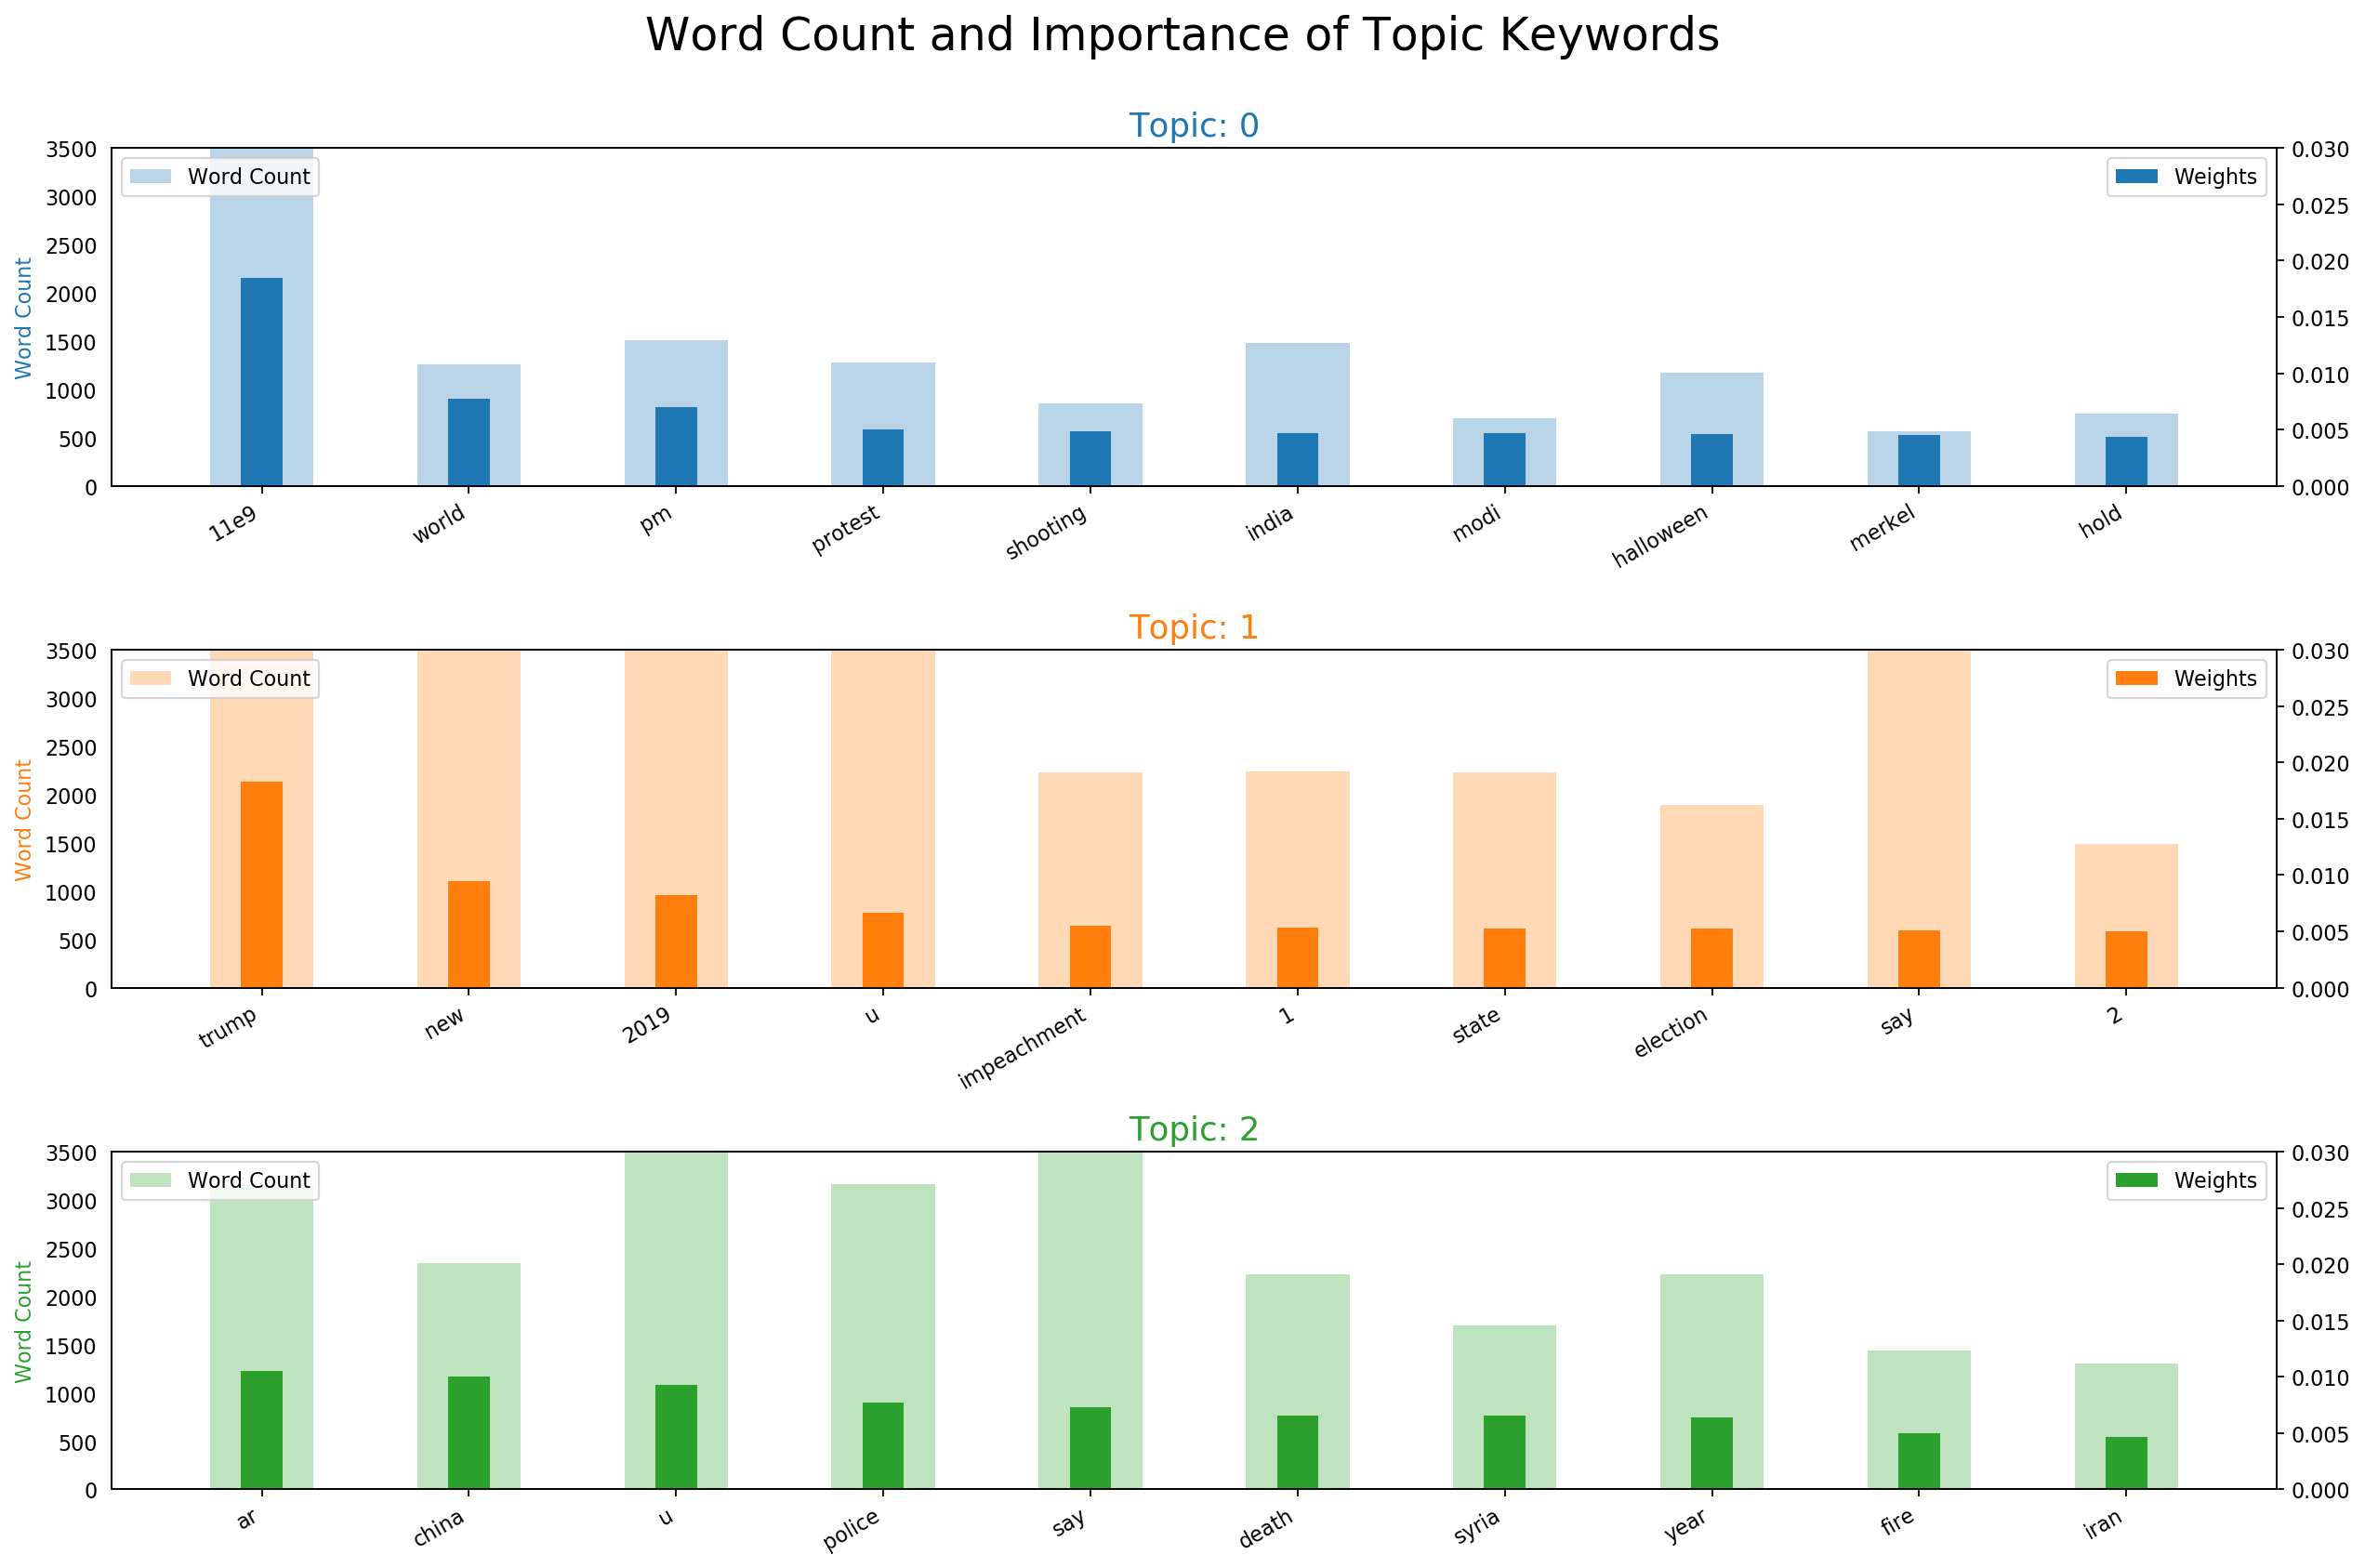

In [26]:
# word_cloud(ldamodel3, 2, 2, "word_cloud_single_3_topics", del_x=1, del_y=1)
word_weight(ldamodel3, doc_clean, "word_weights_single_3_topics ", 3, 1)

In [27]:
%%time 
ldamodel5 = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

CPU times: user 37min 14s, sys: 11.8 s, total: 37min 25s
Wall time: 37min 47s


In [28]:
ldamodel5.print_topics(num_topics=5, num_words=5)

[(0,
  '0.025*"11e9" + 0.011*"trump" + 0.011*"election" + 0.010*"world" + 0.008*"say"'),
 (1, '0.022*"ar" + 0.013*"2019" + 0.011*"news" + 0.010*"fire" + 0.010*"11"'),
 (2,
  '0.018*"new" + 0.014*"syria" + 0.009*"2020" + 0.009*"one" + 0.008*"turkey"'),
 (3,
  '0.013*"man" + 0.012*"year" + 0.011*"police" + 0.010*"death" + 0.008*"india"'),
 (4,
  '0.030*"u" + 0.021*"trump" + 0.014*"china" + 0.011*"impeachment" + 0.010*"state"')]

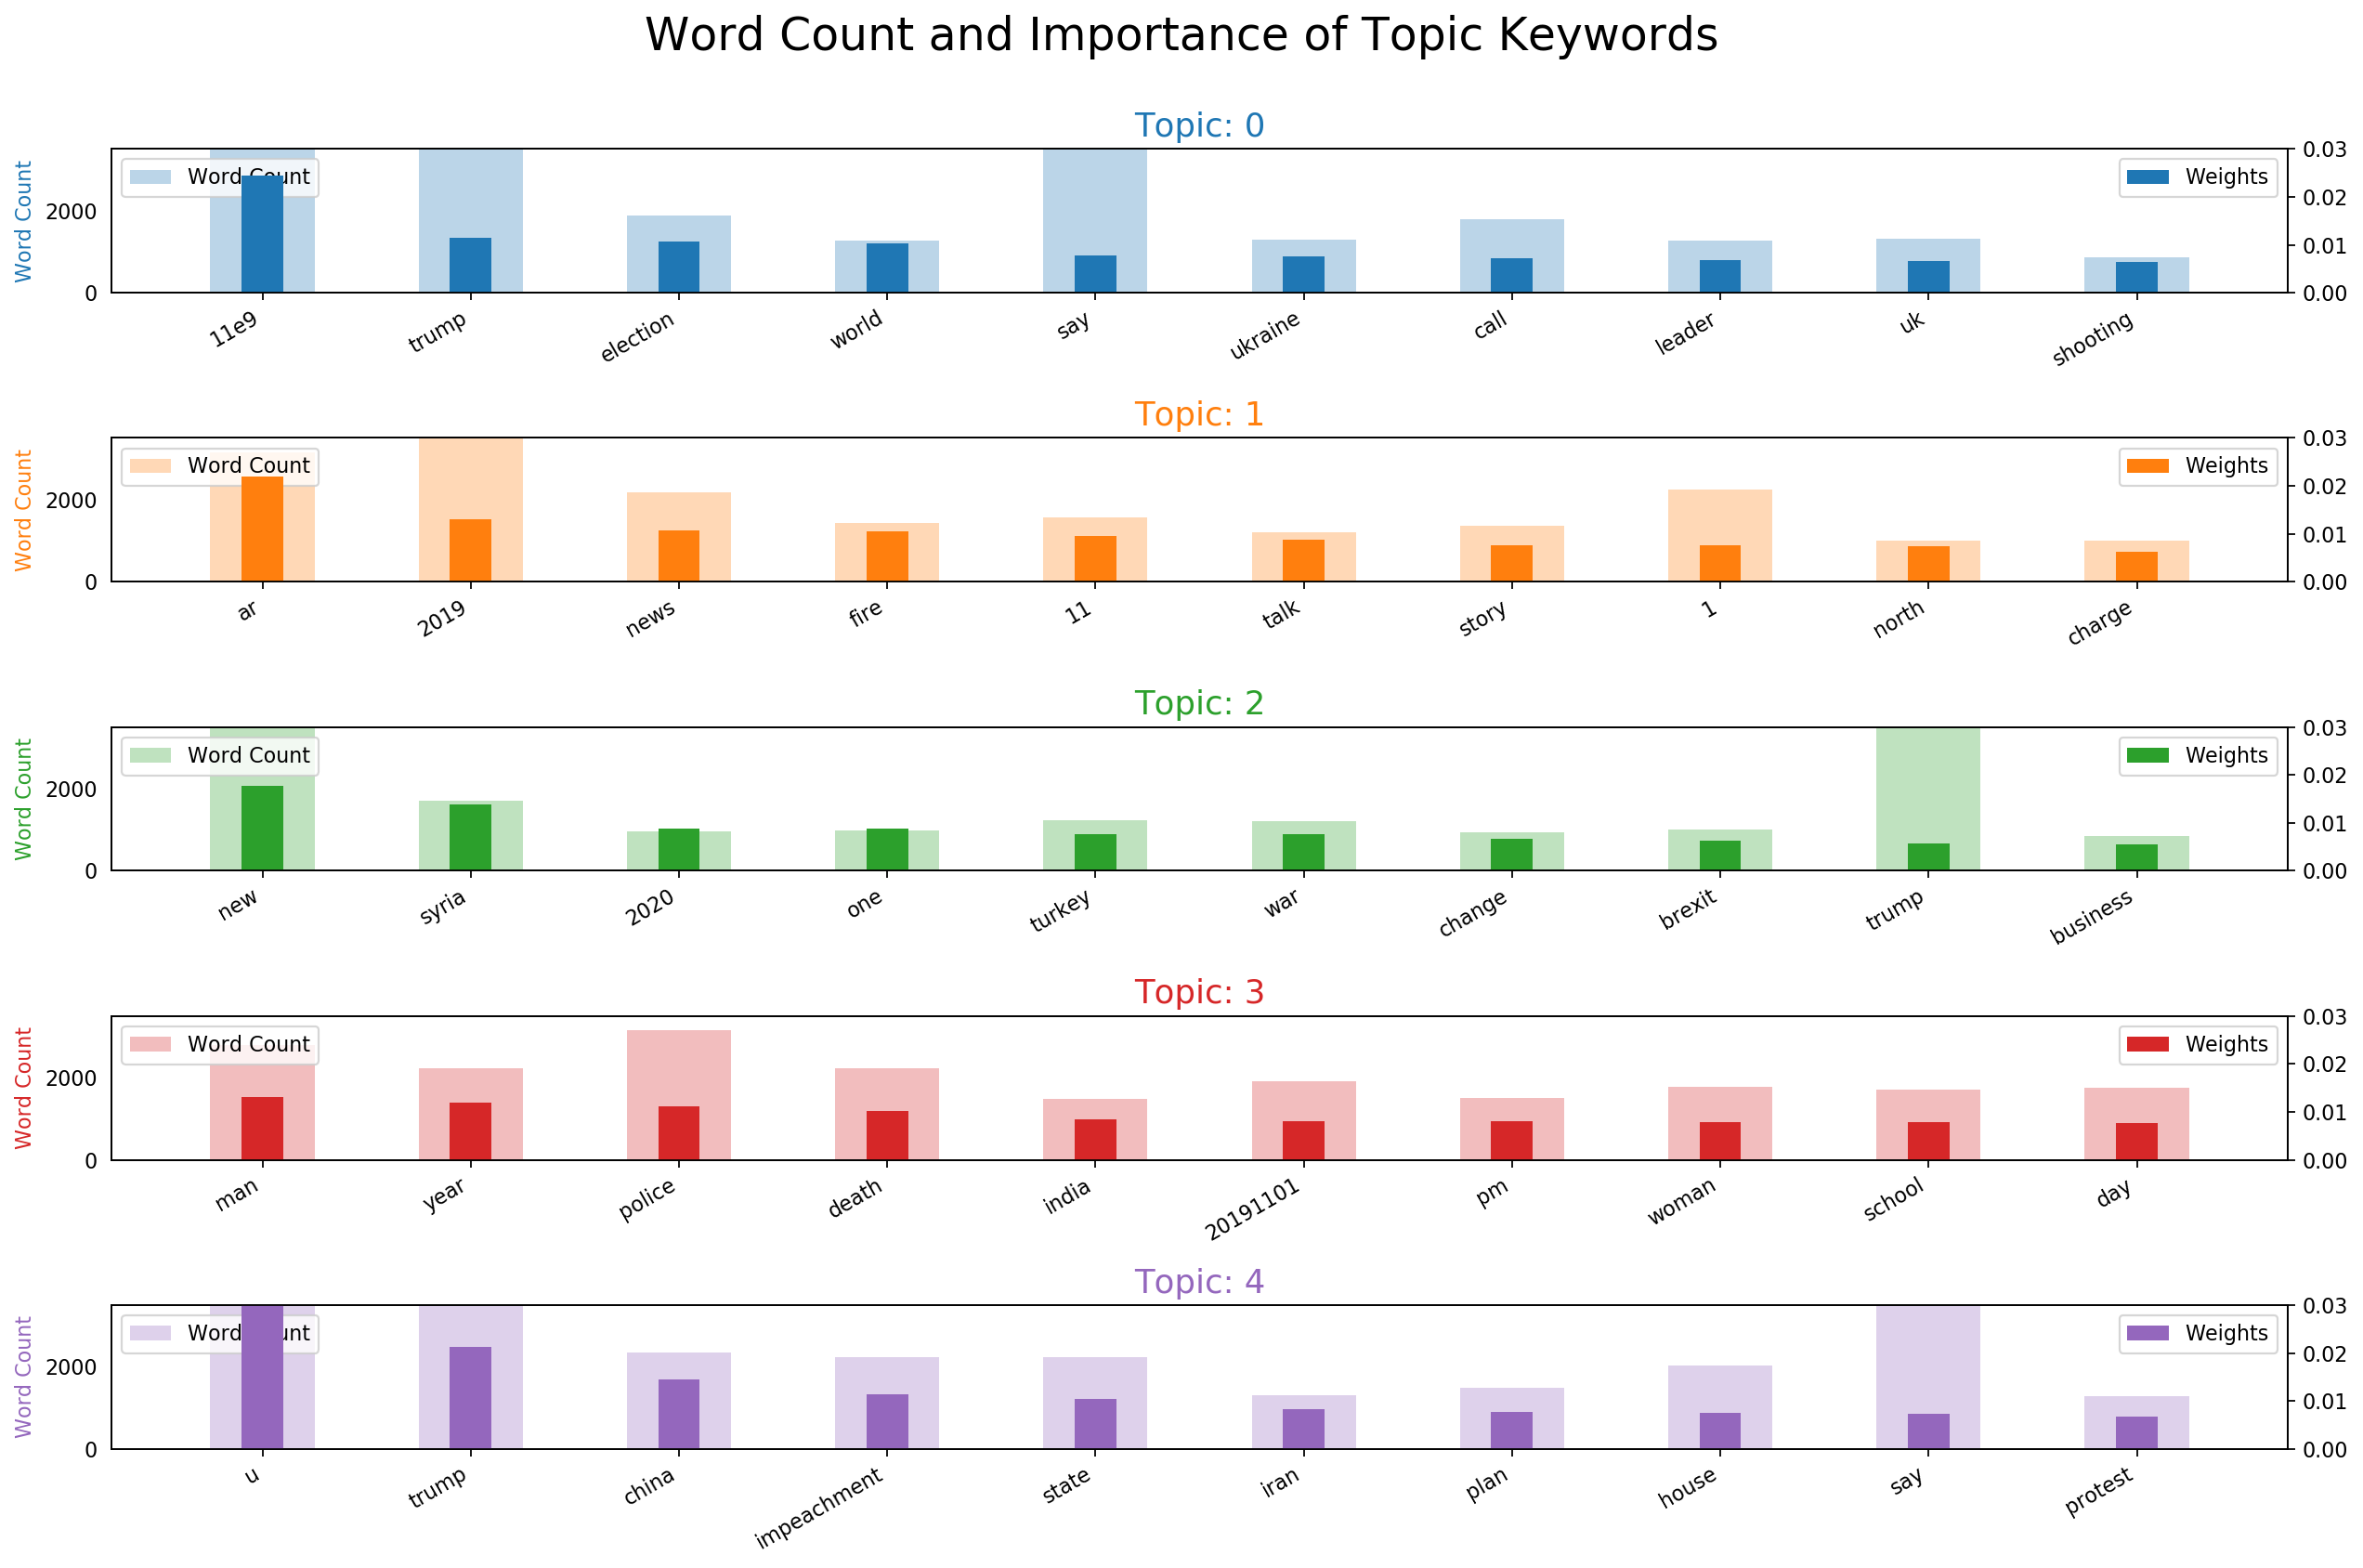

In [29]:
# word_cloud(ldamodel5, 3, 2, "word_cloud_single_5_topics", del_x=2, del_y=1)
word_weight(ldamodel5, doc_clean, "word_weights_single_5_topics ", 5, 1)

## USA/CHINA

In [3]:
us_chn_data = pd.read_csv("fin_test")
us_chn_data = us_chn_data[us_chn_data["SQLDATE"] >= 20200301]
us_chn_data

,SQLDATE,Actor1Code,Actor2Code,EventCode,DATEADDED,ActionGeo_Lat,ActionGeo_Long,NumMentions,AvgTone,QuadClass,GoldsteinScale,NumArticles,SOURCEURL
0,20200301,CHN,USA,256,20200301200000,35.0000,105.000,3,-2.698023,1,-0.3,3,http://www.wboc.com/story/41836455/virus-cases...
1,20200302,CHN,USA,256,20200302000000,35.0000,105.000,6,-2.781947,1,-0.3,6,https://www.wiscnews.com/news/world/virus-acce...
2,20200302,USA,CHN,192,20200302123000,35.0000,105.000,8,-0.351494,4,-9.5,8,https://www.thesundaily.my/opinion/birds-of-a-...
3,20200302,CHN,USA,15,20200302174500,35.0000,105.000,10,-18.243243,1,0.0,10,https://www.wwnytv.com/2020/03/02/robinson-ple...
4,20200302,USA,CHN,15,20200302174500,35.0000,105.000,4,-18.243243,1,0.0,2,https://www.wwnytv.com/2020/03/02/robinson-ple...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,20200418,USA,CHN,1721,20200418033000,39.9289,116.388,10,-4.060914,4,-5.0,10,https://www.express.co.uk/news/world/1270605/u...
3621,20200416,USA,CHN,163,20200416081500,39.9289,116.388,1,-3.926097,4,-8.0,1,https://www.telegraph.co.uk/politics/2020/04/1...
3622,20200416,CHN,USA,183,20200416190000,39.9289,116.388,2,-7.387863,4,-10.0,2,https://www.taipeitimes.com/News/world/archive...
3623,20200317,USA,CHN,193,20200416153000,39.9289,116.388,4,-3.011204,4,-10.0,4,https://www.japantimes.co.jp/2020/04/17/


In [4]:
min(us_chn_data.SQLDATE)

20200301

In [5]:
max(us_chn_data.SQLDATE)

20200429

In [6]:
len(us_chn_data)

3561

In [4]:
us_doc_complete = [x_split(x).replace("-", " ") for x in us_chn_data["SOURCEURL"] if len(x.split("-")) >1]

## US/China TD/IDF

In [5]:
vectorizer = TfidfVectorizer(use_idf=True, stop_words=stop_words)
vectors = vectorizer.fit_transform(us_doc_complete)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
us_chn_tf = pd.DataFrame(denselist, columns=feature_names)

In [6]:
new_data = us_chn_tf.replace(0, np.nan)
new_data = new_data.loc[:, new_data.isnull().mean() <= .99]

In [7]:
means = us_chn_tf.mean(axis=0)
new_df = pd.concat([pd.DataFrame(us_chn_tf.columns.tolist()), pd.DataFrame(means.values)], axis=1)
new_df.columns = ["Word", "TF/IDF"]

In [8]:
data = new_df.sort_values("TF/IDF", ascending=False).head(20)
data.reset_index(inplace=True)
data

,index,Word,TF/IDF
0,1831,china,0.034598
1,2033,coronavirus,0.034292
2,2957,html,0.032640
3,5136,us,0.021743
4,5058,trump,0.018129
5,2956,htm,0.016341
6,2070,covid,0.015720
7,212,19,0.014817
8,1838,chinese,0.013019
9,1223,ar,0.011991


/cs/home/jk218/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


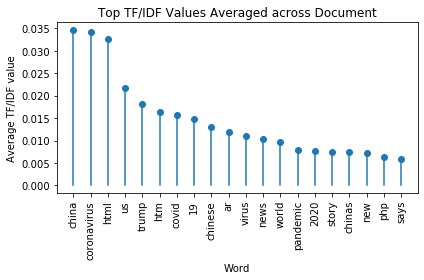

In [32]:
plt.stem(data["Word"], data["TF/IDF"], basefmt=" ")
plt.xticks(rotation=90)
plt.xlabel("Word")
plt.ylabel("Average TF/IDF value")
plt.title("Top TF/IDF Values Averaged across Document")
plt.tight_layout()
plt.savefig("usa_stem_tfidf.png")

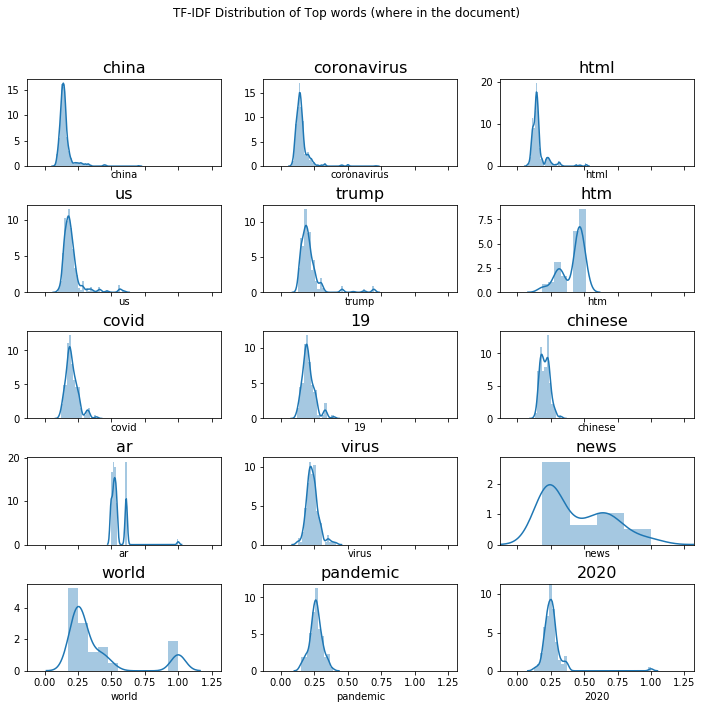

In [54]:
fig, axes = plt.subplots(5, 3, figsize=(10,10),  sharex=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    word = data["Word"][i]
    seaborn.distplot(us_chn_tf[us_chn_tf[word] != 0][word])
    plt.gca().set_title(word, fontdict=dict(size=16))


plt.subplots_adjust(wspace=0, hspace=0)
fig.suptitle("TF-IDF Distribution of Top words (where in the document)\n")
plt.margins(x=0, y=0)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig("usa_tfidf_top_distribution.png")
plt.show()

## US/China LDA 

In [9]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()

In [10]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [11]:
us_doc_complete

['virus cases in italy soar 40 us urges americans not to go',
 'article_7fa2361c 07df 5b9d 9c4b 22e1e9263899.html',
 'birds of a feather flock together NM2068935',
 'robinson pleads guilty forcible touching charge',
 'robinson pleads guilty forcible touching charge',
 'adulting boot camp essential life skills teens canton march 4 june 10 0276047',
 'adulting boot camp essential life skills teens canton march 4 june 10 0276047',
 'u s advisory warns americans not to travel to two regions in italy',
 'id4',
 'super tuesday heres where the democratic presidential candidates stand on tech',
 'article_5ae1dee2 c1bb 53d8 aefe 95e993b0d99e.html',
 'article_b2a2b520 f49b 52eb 846e 6027563e2af2.html',
 'article_b2a2b520 f49b 52eb 846e 6027563e2af2.html',
 'content_75758946.htm',
 'unauthorized history socialism bret baier',
 'virus cases in italy soar 40 us urges americans not to go',
 'virus cases in italy soar 40 us urges americans not to go',
 'ronie berggren wolodarskis fadas om trump ingen

In [12]:
us_doc_clean = [clean(doc).split() for doc in us_doc_complete]   

### LDA Models

In [39]:
us_dictionary = corpora.Dictionary(us_doc_clean)
us_doc_term_matrix = [us_dictionary.doc2bow(doc) for doc in us_doc_clean]

In [40]:
us_ldamodel = LdaModel(us_doc_term_matrix,num_topics=3, id2word = us_dictionary, passes=50)

In [41]:
us_ldamodel.print_topics(num_topics=3, num_words=3)

[(0, '0.036*"coronavirus" + 0.031*"china" + 0.026*"trump"'),
 (1, '0.049*"china" + 0.030*"u" + 0.023*"coronavirus"'),
 (2, '0.022*"covid" + 0.021*"19" + 0.019*"china"')]

In [42]:
us_ldamodel.get_term_topics("china", minimum_probability=0.000001)

[(0, 0.030535849), (1, 0.048686236), (2, 0.01901468)]

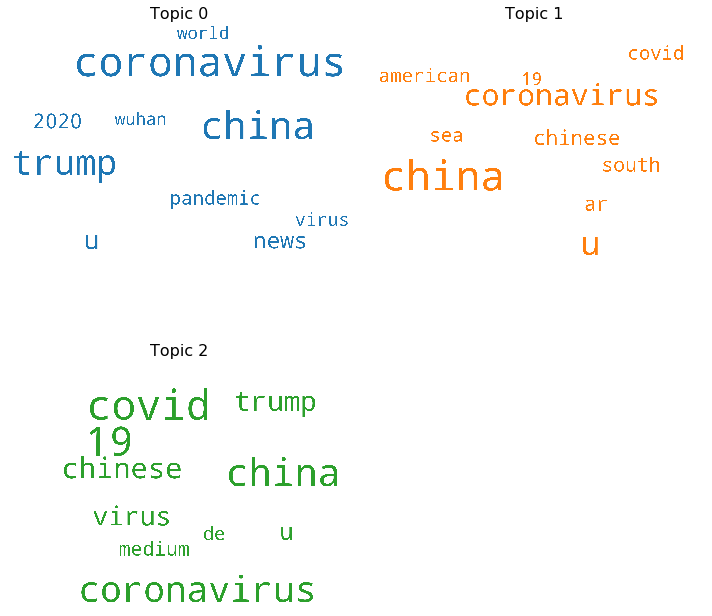

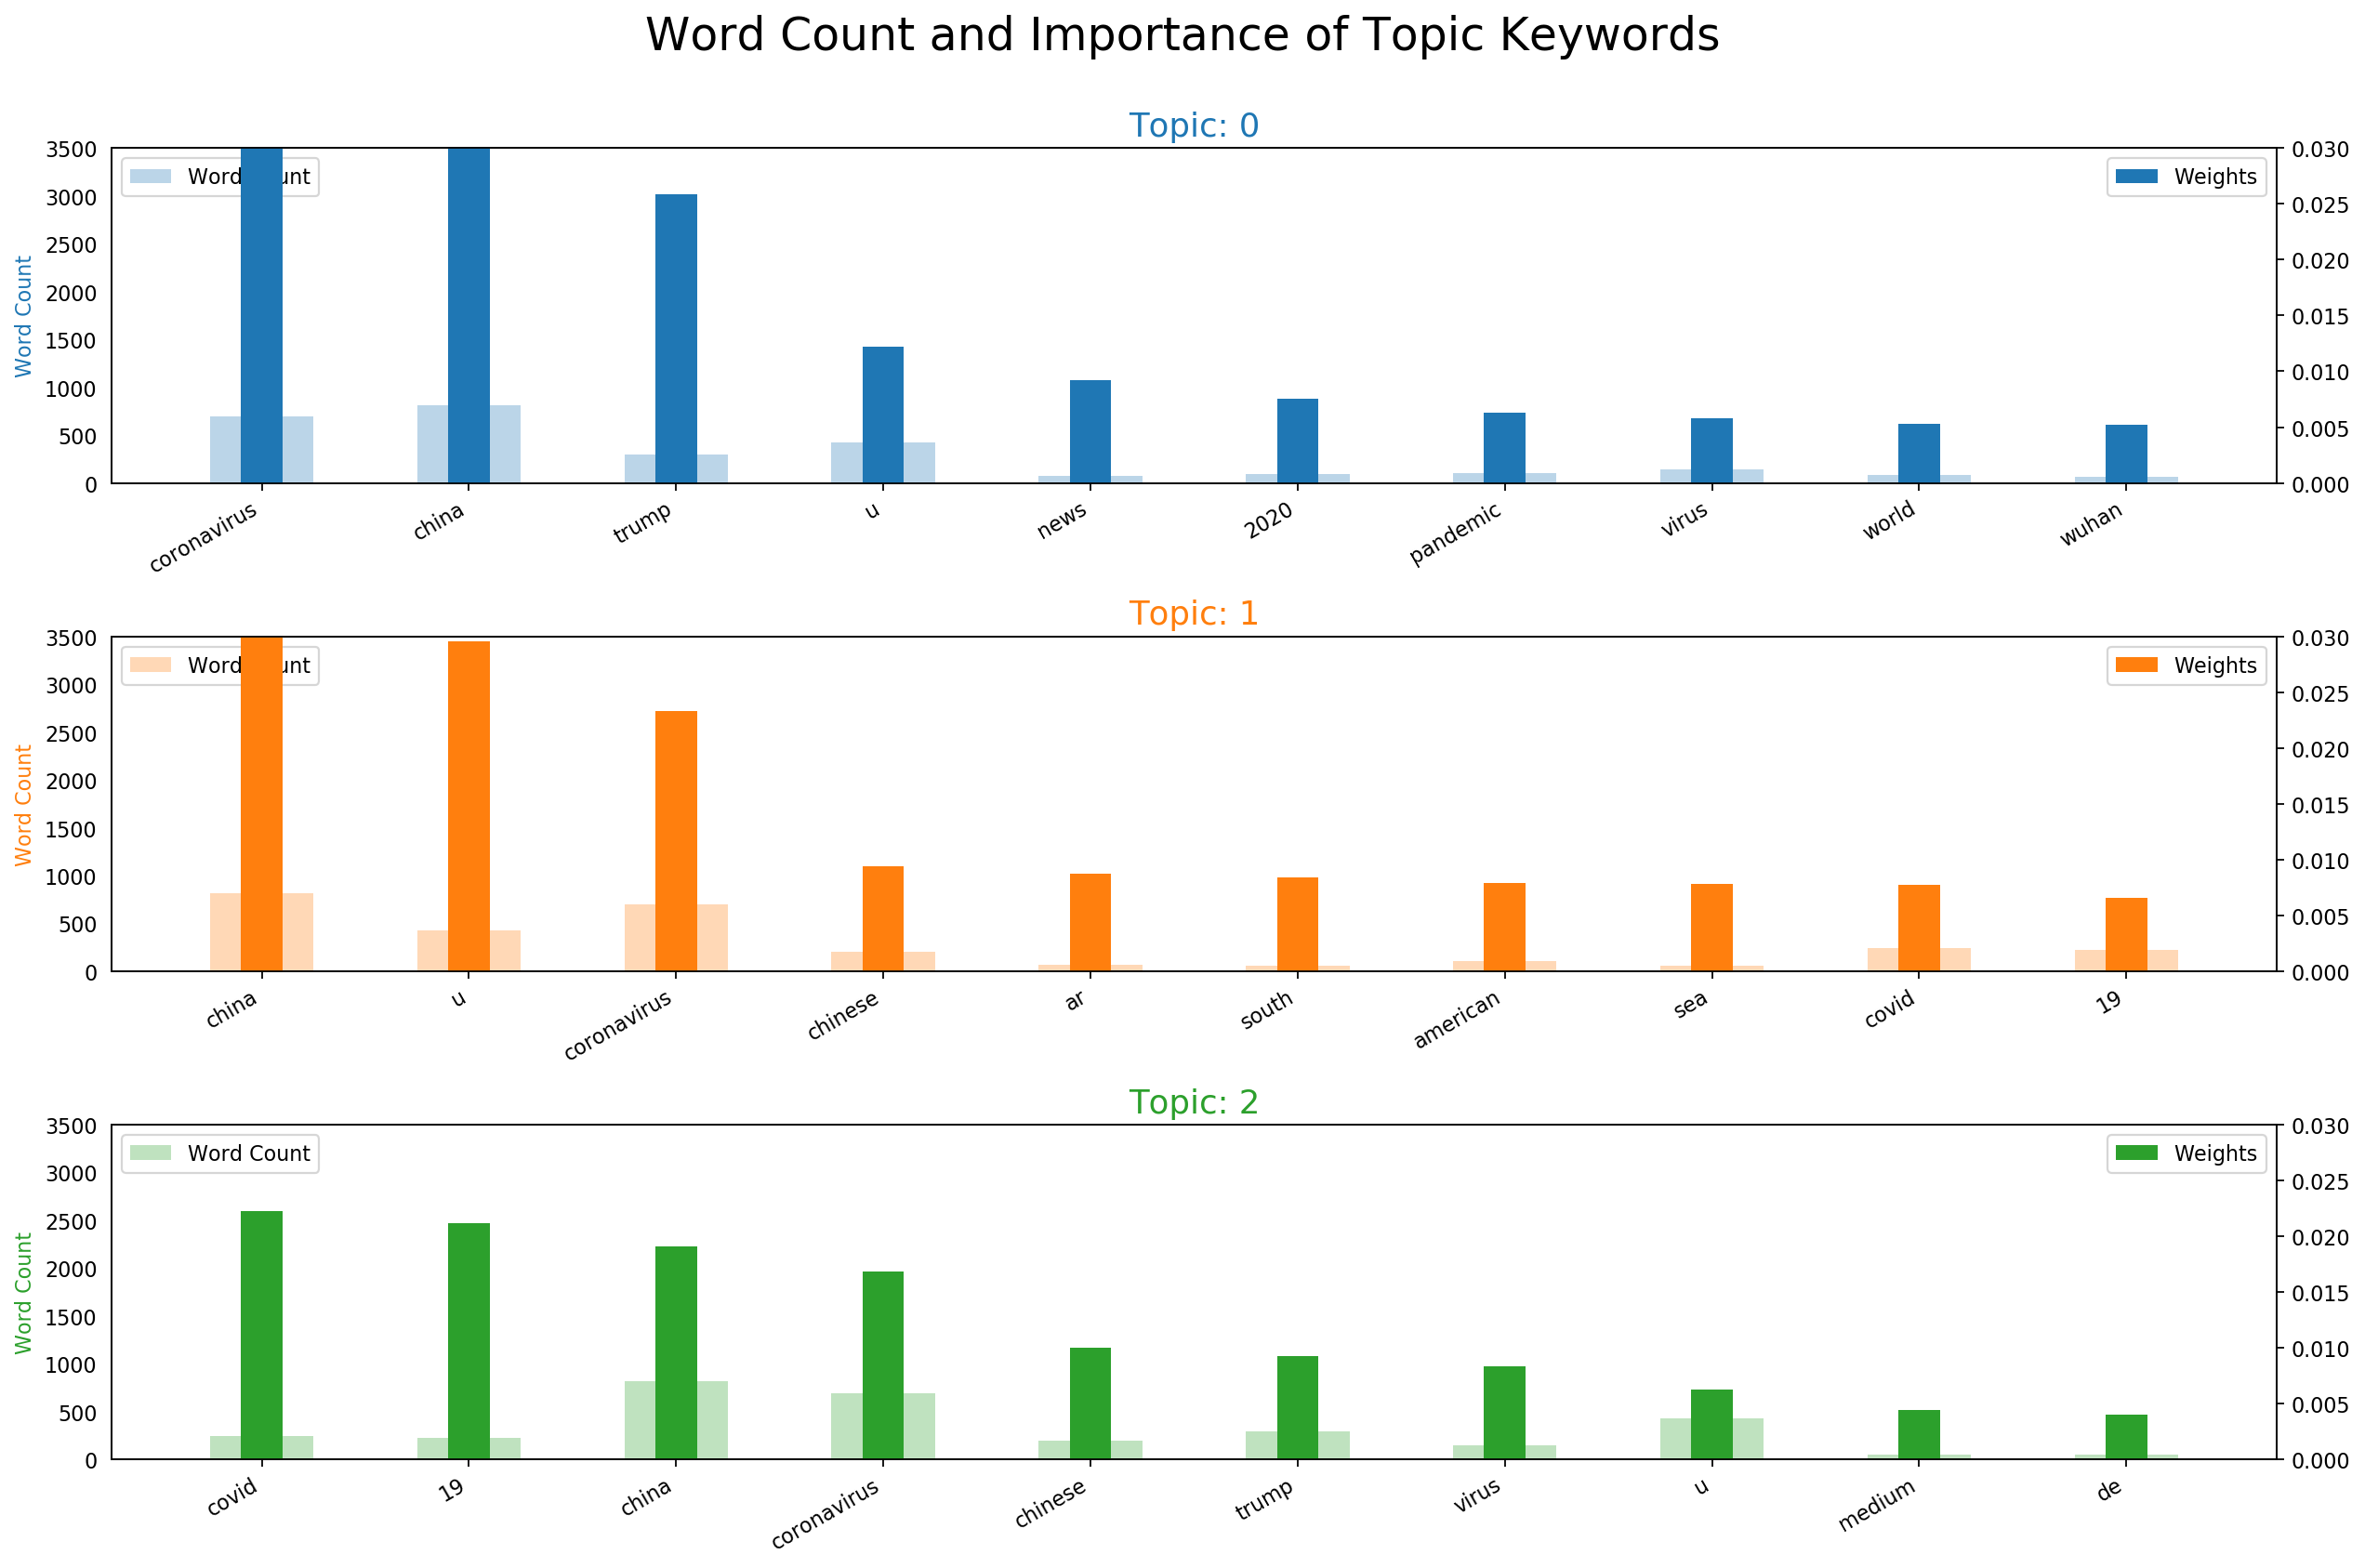

In [49]:
word_cloud(us_ldamodel, 2, 2, "word_cloud_usa_3_topics", del_x=1, del_y=1)
word_weight(us_ldamodel, us_doc_clean, "word_weights_usa_3_topics", 3, 1)

#### 2 topics

In [50]:
us_ldamodel_2 = LdaModel(us_doc_term_matrix, num_topics=2, id2word = us_dictionary, passes=50)
us_ldamodel_2.print_topics(num_topics=2, num_words=3)

[(0, '0.025*"trump" + 0.021*"coronavirus" + 0.015*"china"'),
 (1, '0.048*"china" + 0.030*"u" + 0.029*"coronavirus"')]

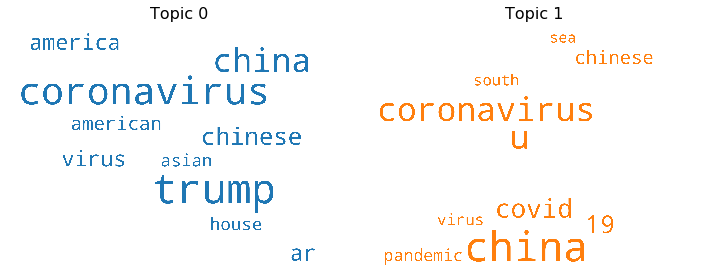

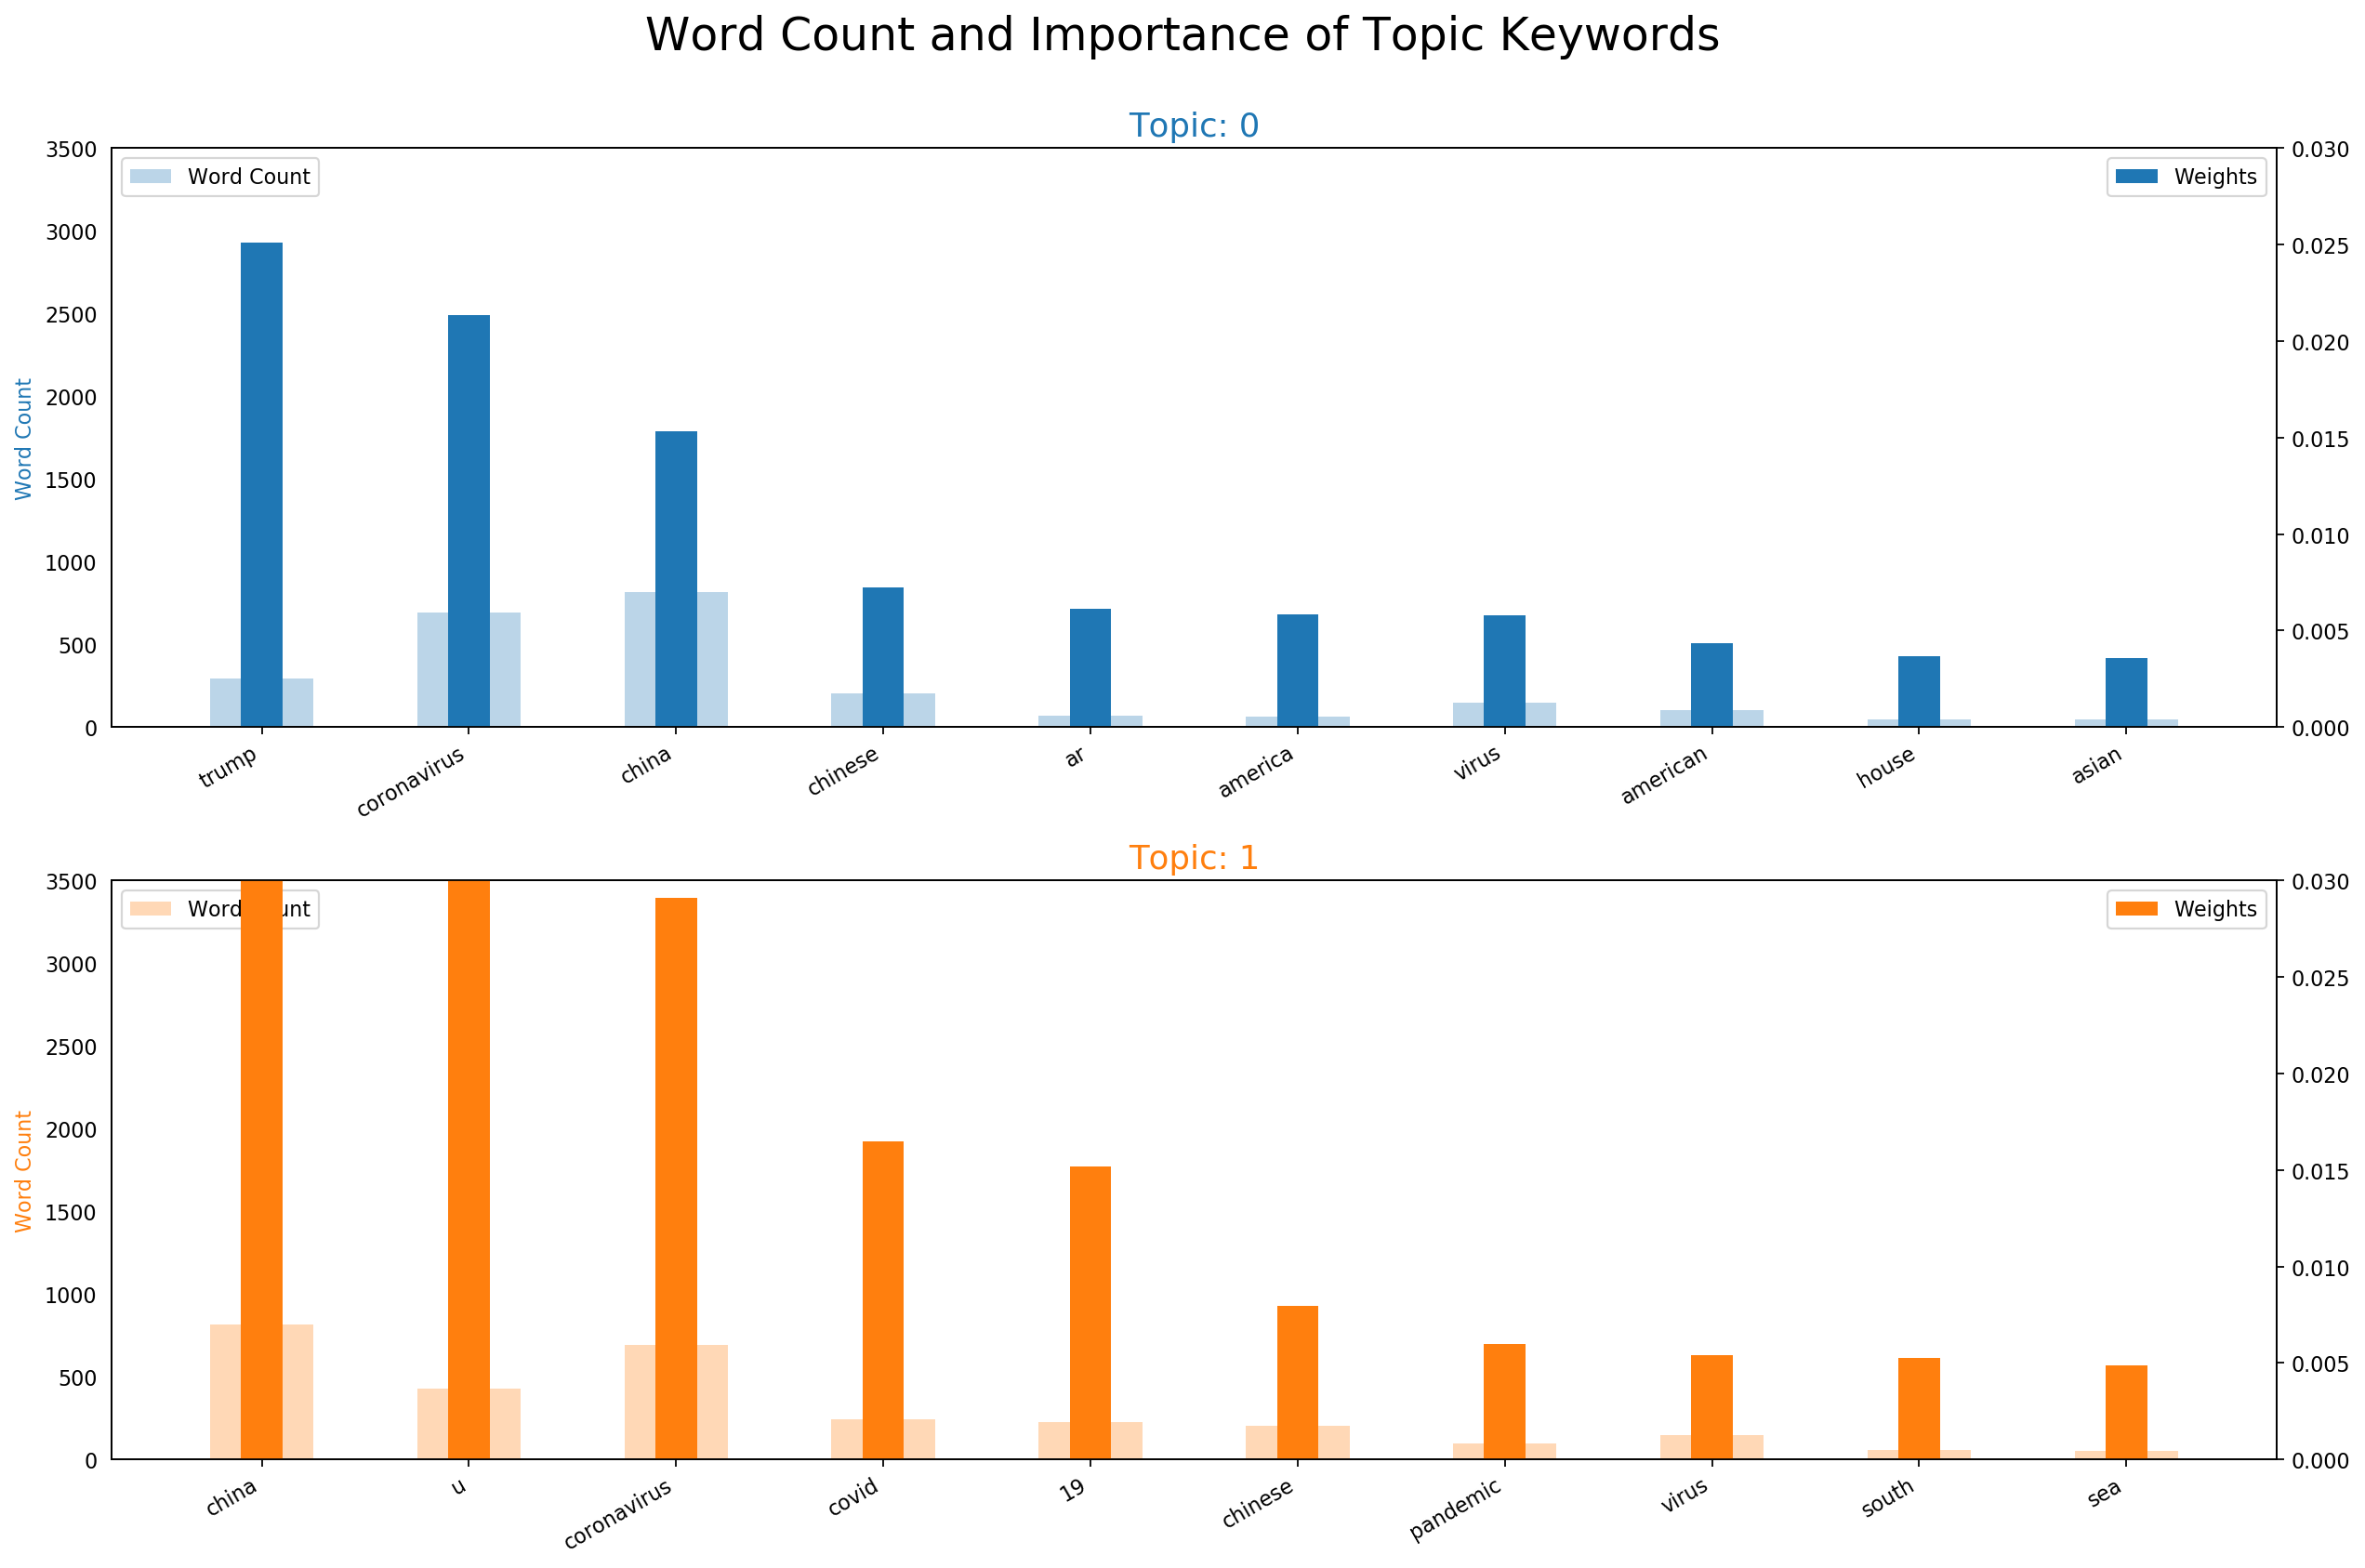

In [51]:
word_cloud(us_ldamodel_2, 1, 2, "word_cloud_usa_2_topics")
word_weight(us_ldamodel_2, us_doc_clean, "word_weights_usa_2_topics", 2, 1)

### 4 topics

In [52]:
us_ldamodel_4 = LdaModel(us_doc_term_matrix, num_topics=4, id2word = us_dictionary, passes=50)
us_ldamodel_4.print_topics(num_topics=4, num_words=3)

[(0, '0.034*"coronavirus" + 0.022*"china" + 0.012*"u"'),
 (1, '0.043*"china" + 0.035*"coronavirus" + 0.020*"trump"'),
 (2, '0.033*"china" + 0.018*"u" + 0.012*"south"'),
 (3, '0.031*"china" + 0.029*"19" + 0.029*"covid"')]

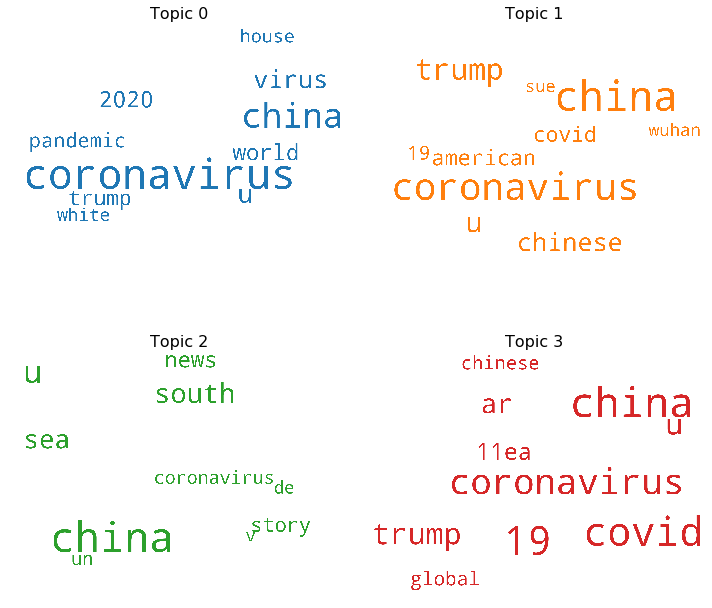

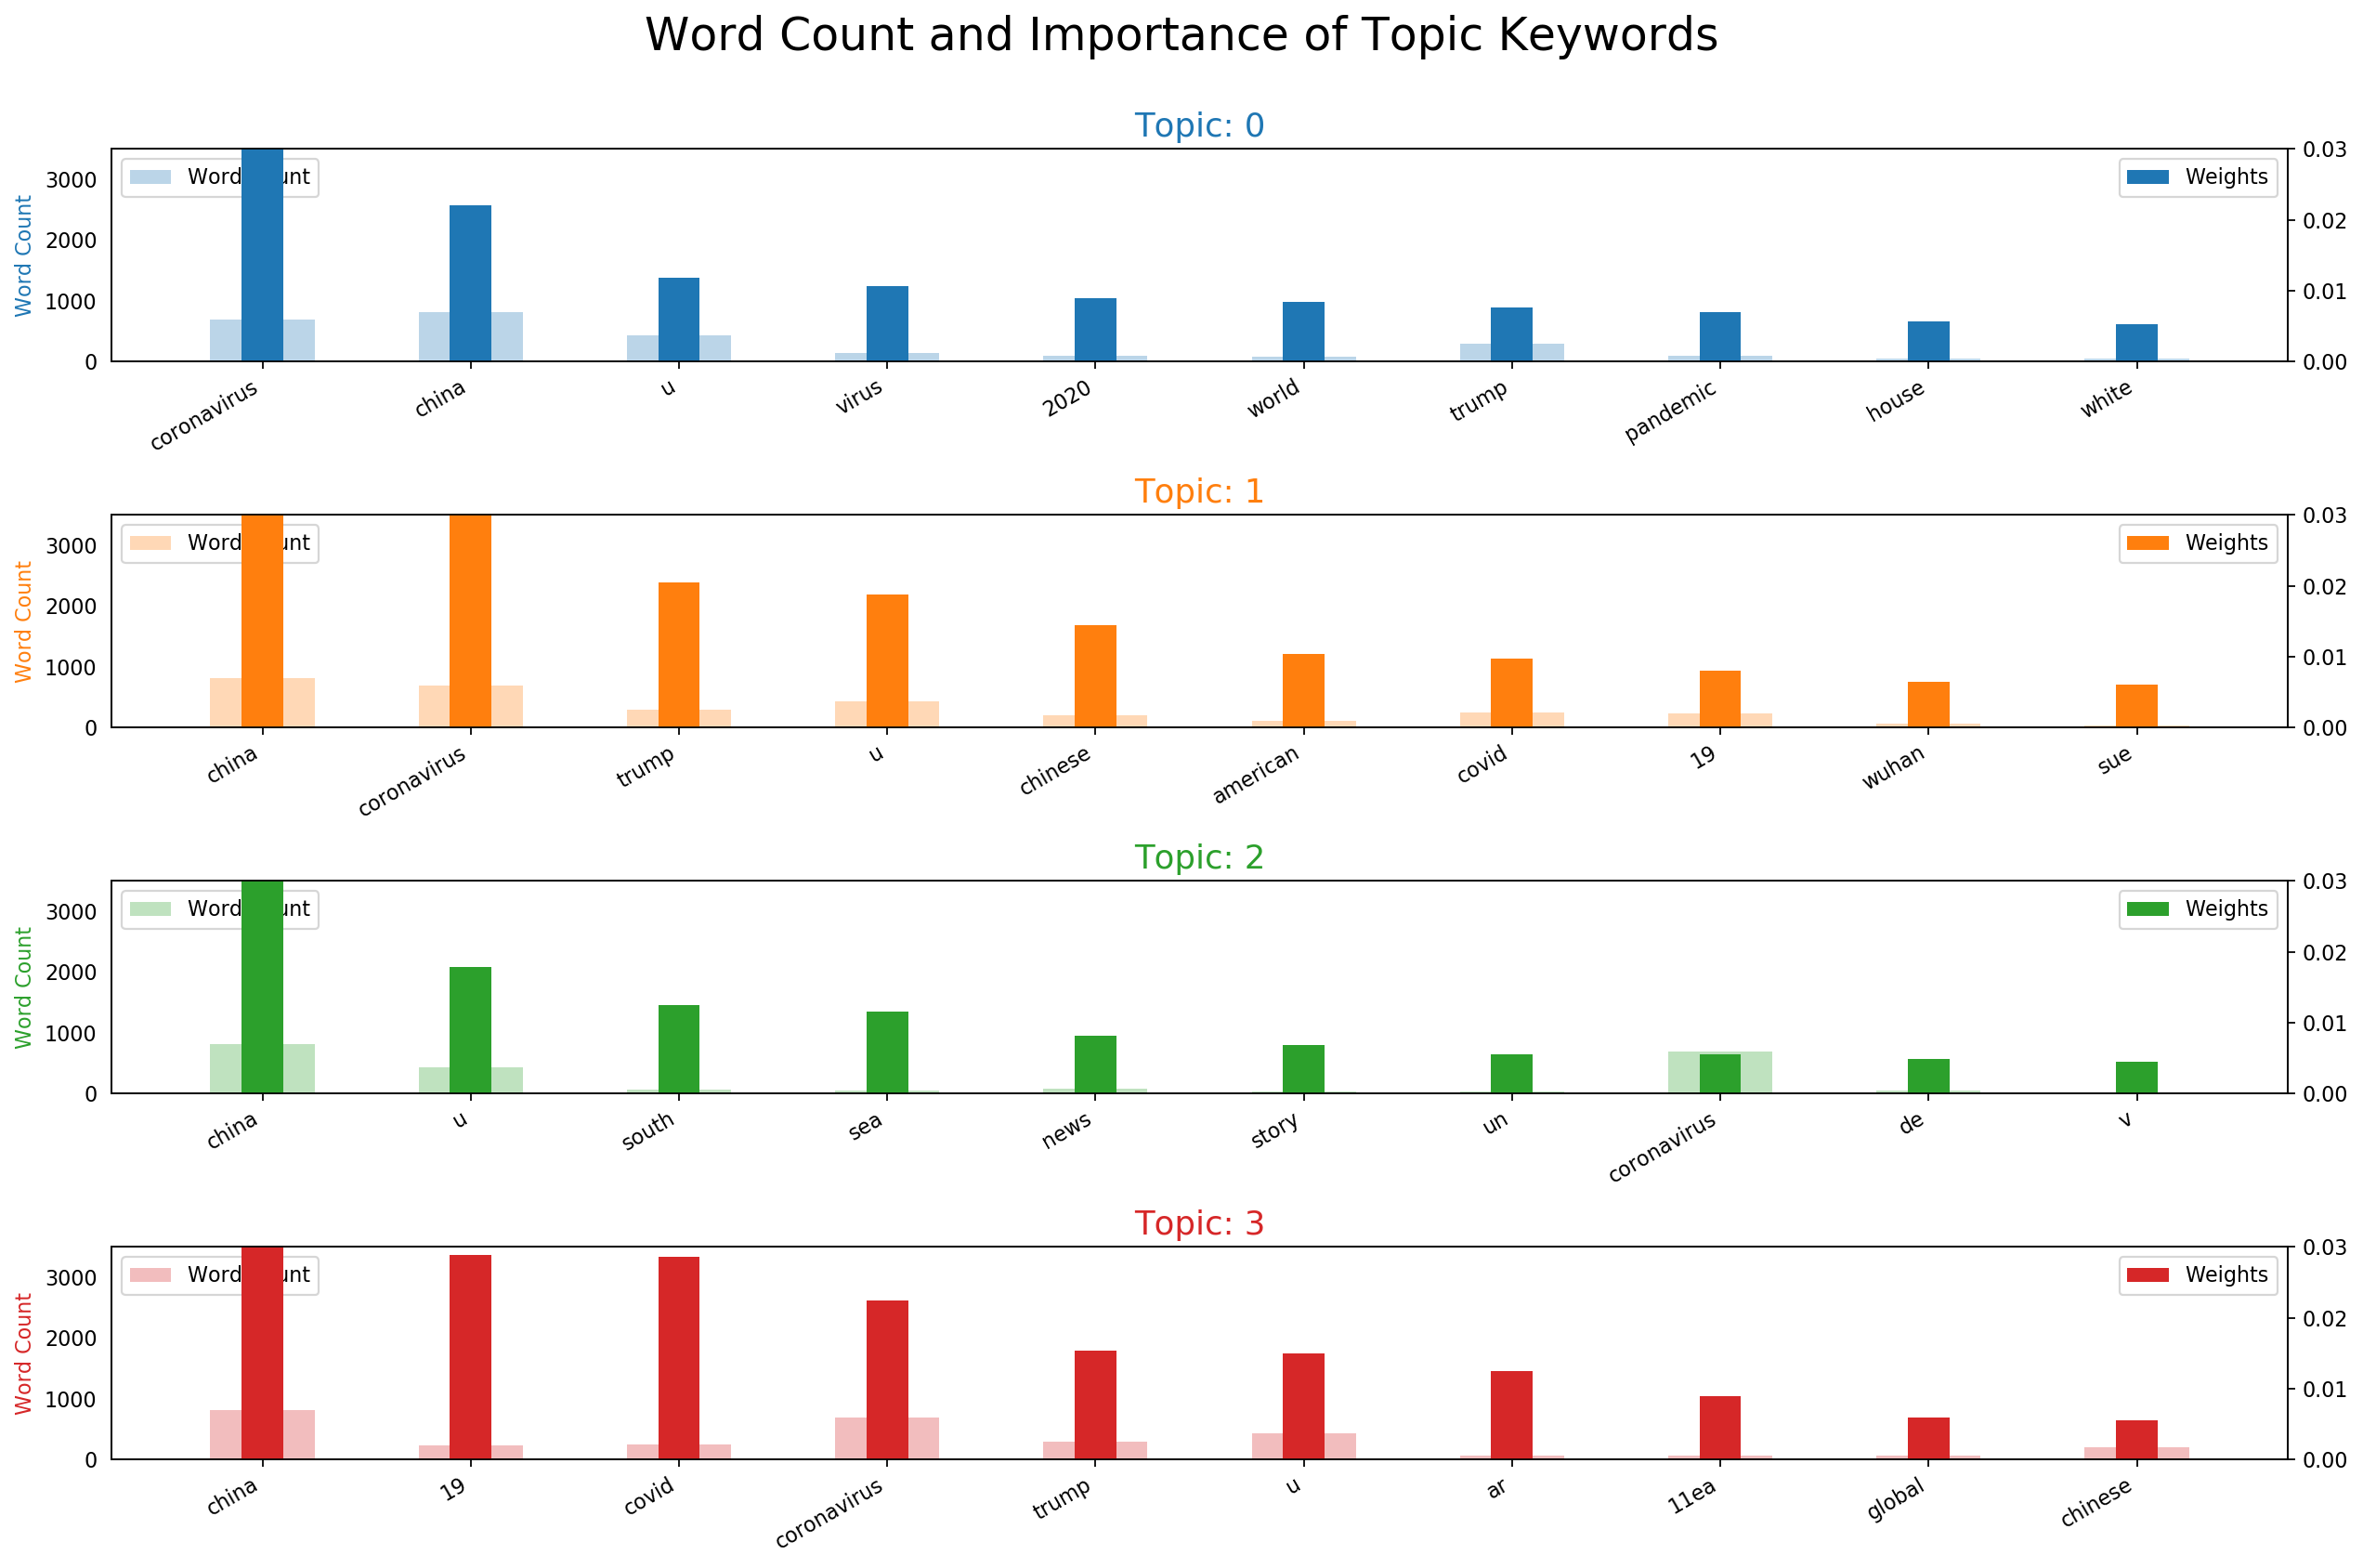

In [53]:
word_cloud(us_ldamodel_4, 2, 2, "word_cloud_usa_4_topics")
word_weight(us_ldamodel_4, us_doc_clean, "word_weights_usa_4_topics", 4, 1)

### Misc Processing

In [397]:
text = ["Brazil", "word", "russia"]
bow = us_dictionary.doc2bow(text)
us_ldamodel.get_document_topics(bow)

[(0, 0.7773676), (1, 0.111325525), (2, 0.11130688)]

In [391]:
us_ldamodel.get_term_topics("user", minimum_probability=0.000001)

[(0, 7.076692e-05), (1, 5.979395e-06), (2, 4.273387e-06)]

In [398]:
us_ldamodel[bow]

[(0, 0.7773674), (1, 0.11132562), (2, 0.11130695)]

In [147]:
import numpy as np

In [19]:
def get_average(text):
    sum_list = []
    for i in text:
        if not sum_list:
            value = [snd for (fst, snd) in us_ldamodel.get_term_topics(i, minimum_probability=0.000001)]
            sum_list = value
        else:
            sum_list = [sum(x) for x in zip(sum_list, value)]
    np.mean(np.array(sum_list)/3)

In [144]:
sum_list

[0.00021230075071798638, 1.7938185465027345e-05, 1.2820160463888897e-05]

## Visualise LDA Model

In [30]:
us_ldamodel = ldamodel5
us_doc_clean = doc_clean

In [20]:

def word_cloud(ldamodel, rows, columns, filename, del_x=None, del_y=None):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = ldamodel.show_topics(formatted=False)
    fig, axes = plt.subplots(rows, columns, figsize=(10,10), sharex=True, sharey=True)


    for i, ax in enumerate(axes.flatten()):
        if i < len(topics):
            fig.add_subplot(ax)
            topic_words = dict(topics[i][1])
            cloud.generate_from_frequencies(topic_words, max_font_size=300)
            plt.gca().imshow(cloud)
            plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
            plt.gca().axis('off')
    
    if del_x is not None and del_y is not None:
        fig.delaxes(axes[del_x,del_y])
        
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig(filename + ".png")

In [25]:
def word_weight(ldamodel, documents, filename, x, y):
    topics = ldamodel.show_topics(formatted=False)
    data_flat = [w for w_list in documents for w in w_list]
    counter = Counter(data_flat)

    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])

    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

    # Plot Word Count and Weights of Topic Keywords
    fig, axes = plt.subplots(x, y, figsize=(16,10), sharey=True, dpi=160)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
    plt.savefig(filename + ".png")
    plt.show()

In [240]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(us_ldamodel[us_doc_term_matrix]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

TypeError: cannot unpack non-iterable int object

## K Means

In [6]:
def pca_tsne(km, k, matrix):
    labels = km.predict(matrix)
    X = matrix.todense()
    cmap = cmap = ListedColormap(seaborn.color_palette("hls", k))
    labels_color_map = {
        0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404'
    }
    
    
    # pca 2 Dimensional
    pca_num_components = 2

    pca = PCA(n_components=pca_num_components)
    reduced_values = pca.fit_transform(X)
    eigenvalues = pca.explained_variance_
#     eigenvalues
        
    

    seaborn.scatterplot(
    x=reduced_values[:, 0], y=reduced_values[:, 1],
    hue=labels,
    palette=seaborn.color_palette("hls", k),
    legend="full",
    alpha=0.4
    )
    plt.savefig("kmeans_2d_pca_k=" + str(k) + ".png")
    plt.close()

    # T-sne 2 dimensional
    tsne_num_components = 2
    embeddings = TSNE(n_components=tsne_num_components)
    Y = embeddings.fit_transform(X)

    seaborn.scatterplot(
        x=Y[:, 0], y=Y[:, 1],
        hue=labels,
        palette=seaborn.color_palette("hls", k),
        legend="full",
        alpha=0.4
    )
    
    plt.savefig("kmeans_2d_tsne_k=" + str(k) + ".png")
    
    # pca 3 Dimensional
    
    pca_num_components = 3
    pca = PCA(n_components=pca_num_components)
    reduced_values = pca.fit_transform(X)
    eigenvalues = pca.explained_variance_

    fig = plt.figure()
    axes = Axes3D(fig)
    axes.scatter(reduced_values[:,0], reduced_values[:,1], reduced_values[:,2], cmap=cmap, c=labels)

    pal = seaborn.color_palette("hls", k)  
    scatter = []
    cluster_labels = []
    for i in range(0,k):
        scatter.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=pal[i], marker = 'o'))
        cluster_labels.append("Cluster " + str(i))
        
    axes.legend(scatter, cluster_labels, numpoints = 1)
    plt.savefig("kmeans_3d_pca_k=" + str(k) + ".png")

    # T-SNE 3 Dimensional
    
    tsne_num_components = 3
    embeddings = TSNE(n_components=tsne_num_components)
    Y = embeddings.fit_transform(X)
    pal = seaborn.color_palette("hls", k)
    
    fig = plt.figure()
    axes = Axes3D(fig)
    axes.scatter(Y[:,0], Y[:,1], Y[:,2], c=labels, cmap=cmap)

    scatter = []
    cluster_labels = []
    for i in range(0,k):
        scatter.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=pal[i], marker = 'o'))
        cluster_labels.append("Cluster " + str(i))
        
    axes.legend(scatter, cluster_labels, numpoints = 1)

    plt.savefig("kmeans_3d_tsne_k=" + str(k) + ".png")

ref http://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/

In [7]:
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words


In [13]:
texts =  [' '.join(i) for i in us_doc_clean]
texts = [i for i in texts if len(i.split(" ")) > 1]

In [14]:
texts

['virus case italy soar 40 u urge american go',
 'article7fa2361c 07df 5b9d 9c4b 22e1e9263899html',
 'bird feather flock together nm2068935',
 'robinson pleads guilty forcible touching charge',
 'robinson pleads guilty forcible touching charge',
 'adulting boot camp essential life skill teen canton march 4 june 10 0276047',
 'adulting boot camp essential life skill teen canton march 4 june 10 0276047',
 'u advisory warns american travel two region italy',
 'super tuesday here democratic presidential candidate stand tech',
 'article5ae1dee2 c1bb 53d8 aefe 95e993b0d99ehtml',
 'articleb2a2b520 f49b 52eb 846e 6027563e2af2html',
 'articleb2a2b520 f49b 52eb 846e 6027563e2af2html',
 'unauthorized history socialism bret baier',
 'virus case italy soar 40 u urge american go',
 'virus case italy soar 40 u urge american go',
 'ronie berggren wolodarskis fadas om trump ingen overraskning',
 'ronie berggren wolodarskis fadas om trump ingen overraskning',
 'article7fa2361c 07df 5b9d 9c4b 22e1e926389

In [15]:
vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words=stop_words,
                      use_idf=True)
matrix = vec.fit_transform(texts)

/cs/home/jk218/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


### k = 2

In [16]:
number_of_clusters = 2
km_2 = KMeans(n_clusters=number_of_clusters, random_state=0)
distances_to_centres = km_2.fit_transform(matrix)

In [17]:
print("Top terms per cluster:")
order_centroids = km_2.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :3]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: china coronaviru u
Cluster 1: covid 19 china


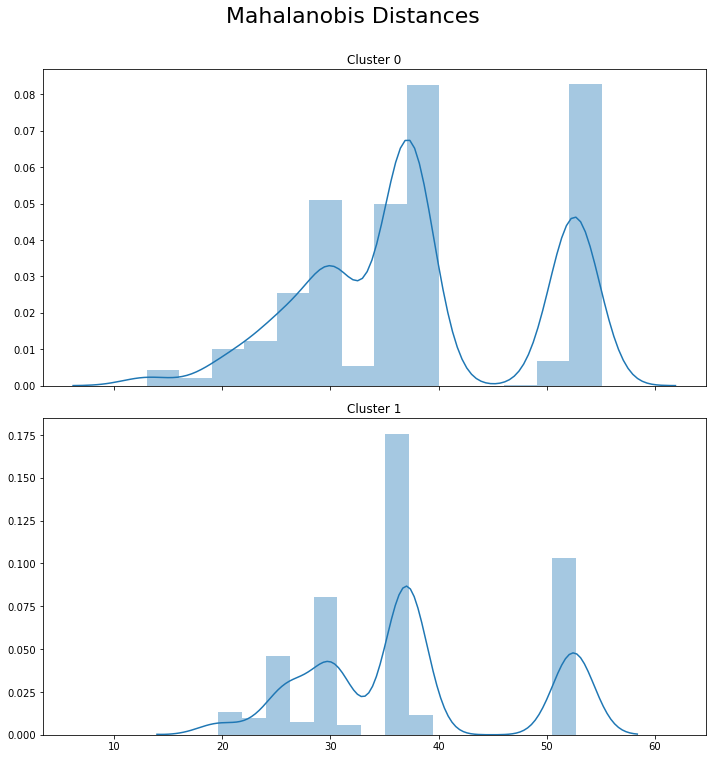

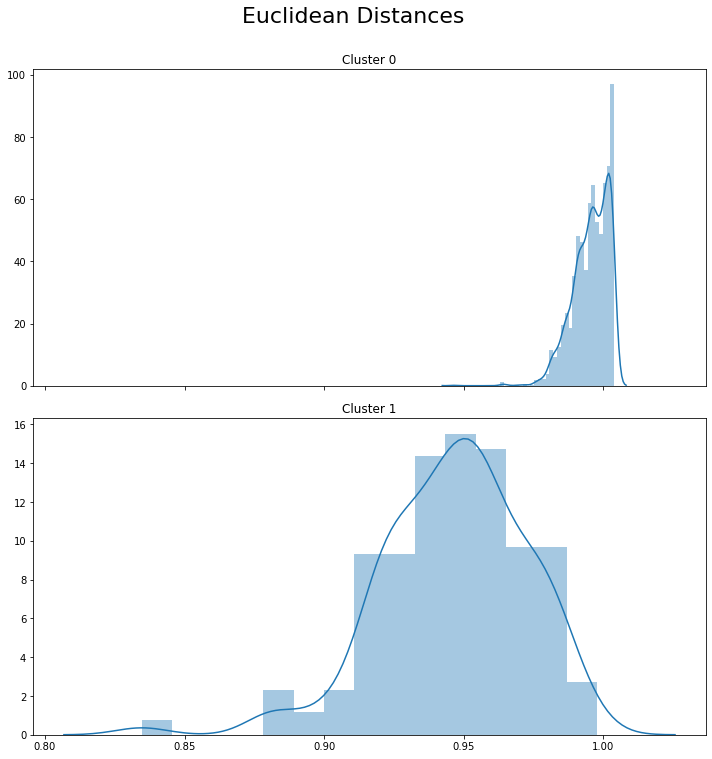

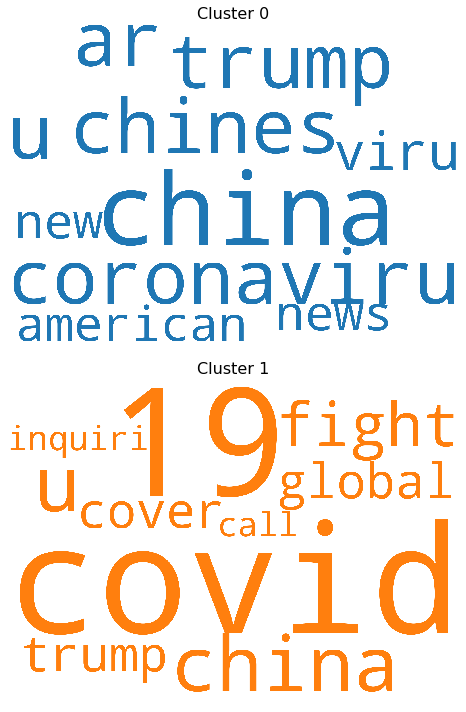

In [24]:
plot_distance(km_2)
plot_word_cloud_kmeans(km_2, 2, 2, 1)

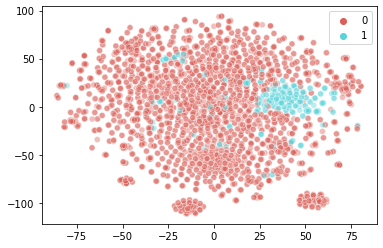

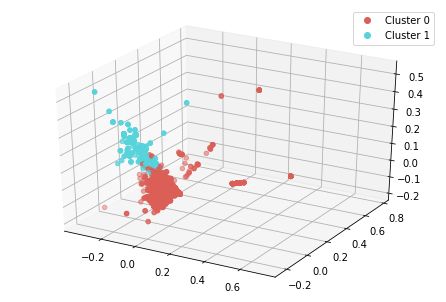

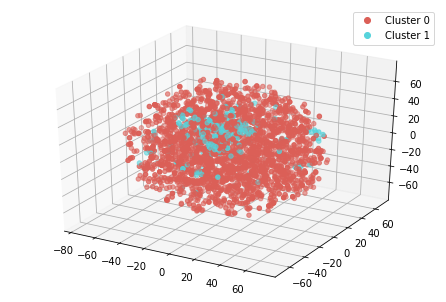

In [19]:
pca_tsne(km_2, 2, matrix)

### k = 3 

In [26]:
number_of_clusters = 3
km_3 = KMeans(n_clusters=number_of_clusters, random_state=0)
distances_to_centres = km_3.fit_transform(matrix)

print("Top terms per cluster:")
order_centroids = km_3.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :3]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: trump coronaviru donald
Cluster 1: covid 19 china
Cluster 2: china coronaviru u


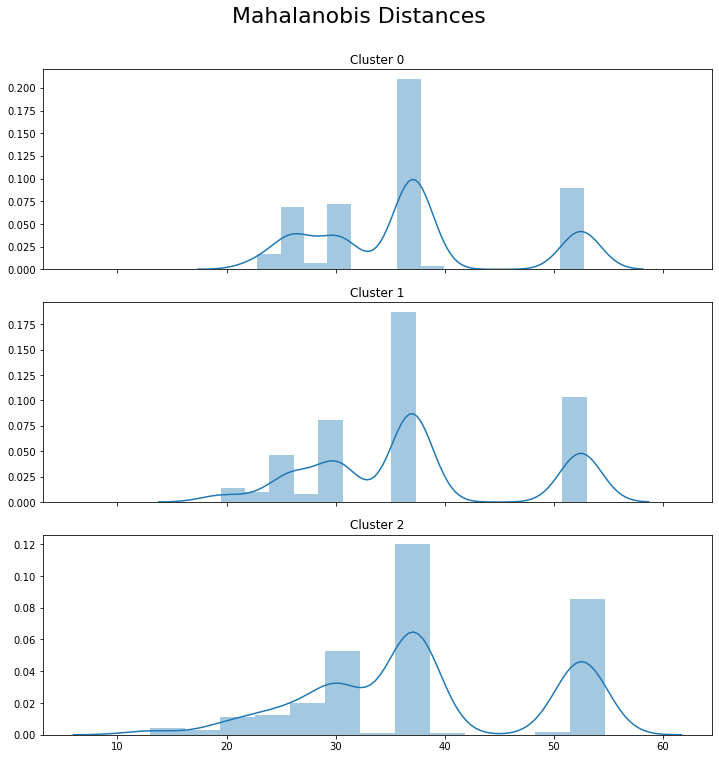

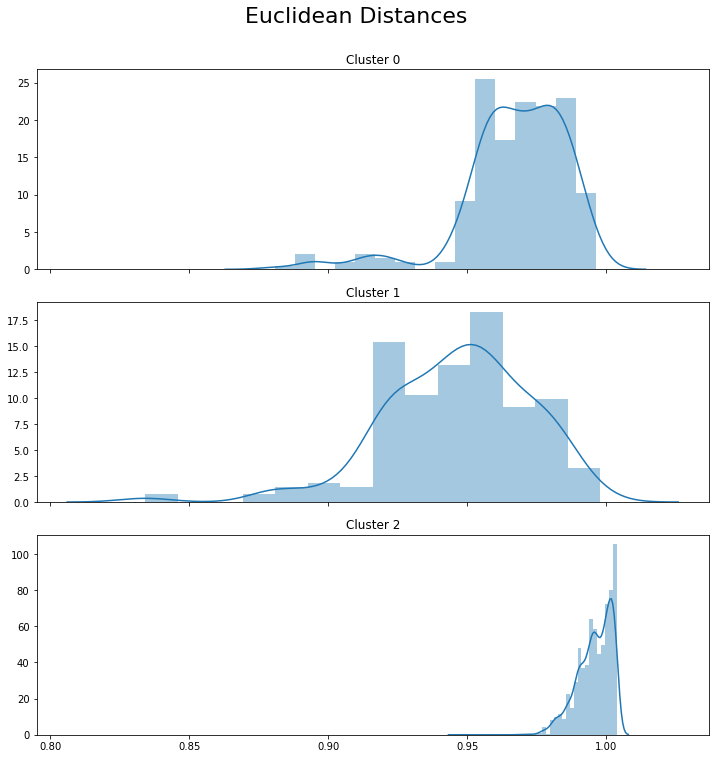

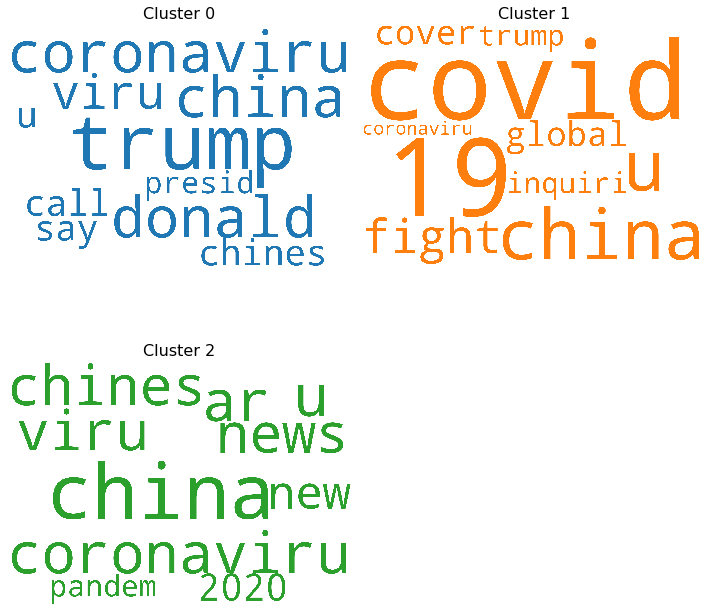

In [27]:
plot_distance(km_3)
plot_word_cloud_kmeans(km_3, 3, 2, 2, 1, 1)

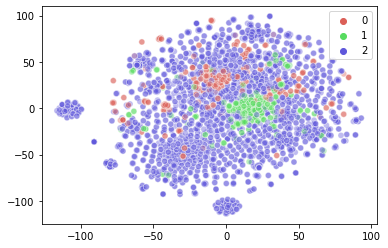

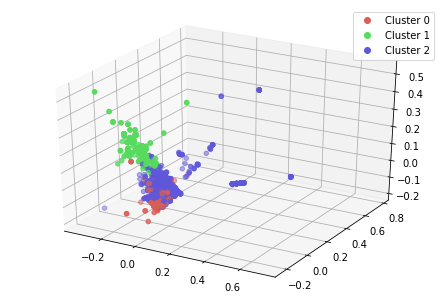

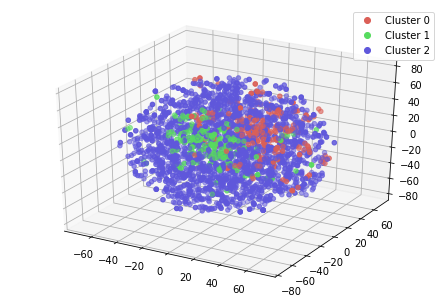

In [28]:
pca_tsne(km_3, 3, matrix)

### k=4 

In [29]:
number_of_clusters = 4
km_4 = KMeans(n_clusters=number_of_clusters, random_state=0)
distances_to_centres = km_4.fit_transform(matrix)

print("Top terms per cluster:")
order_centroids = km_4.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :3]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: trump coronaviru donald
Cluster 1: covid 19 china
Cluster 2: china u ar
Cluster 3: coronaviru china u


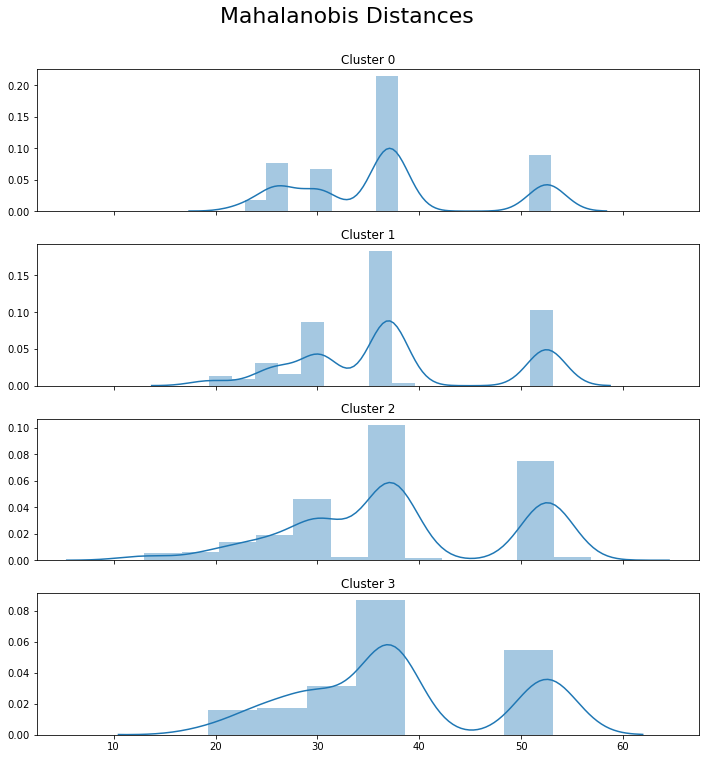

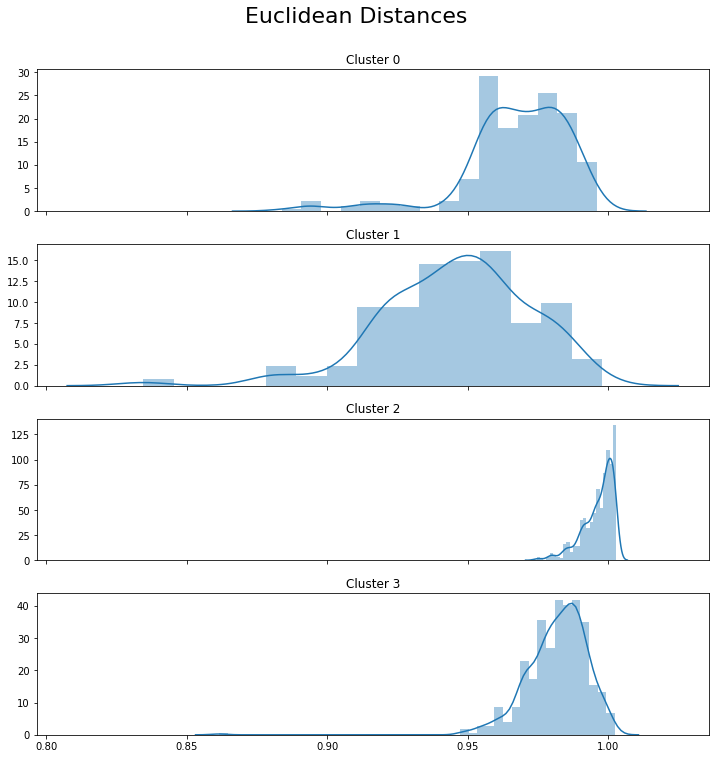

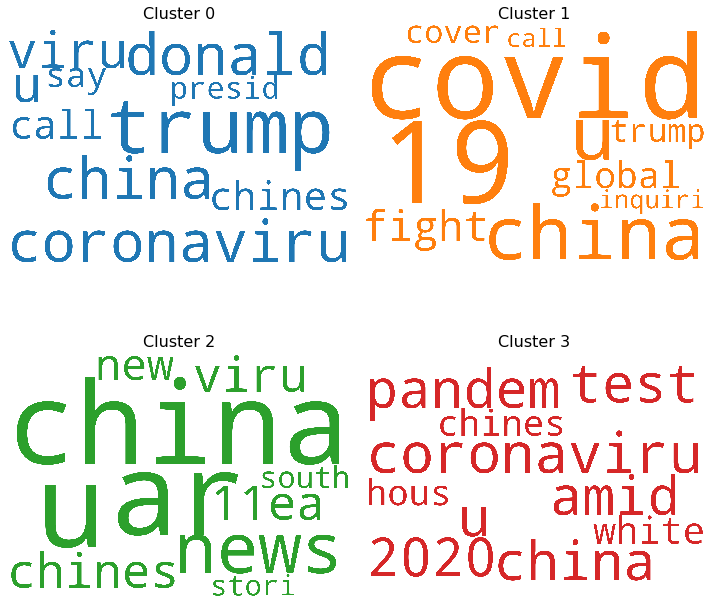

In [30]:
plot_distance(km_4)
plot_word_cloud_kmeans(km_4, 4, 2, 2)

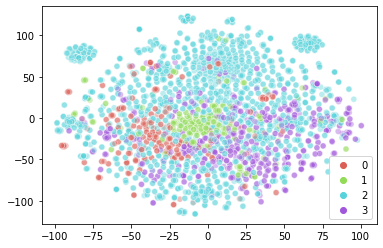

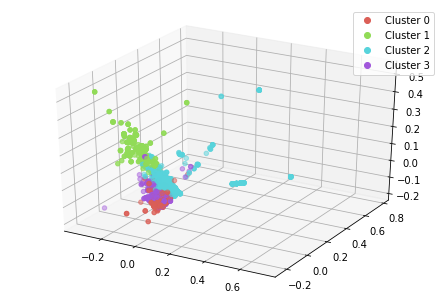

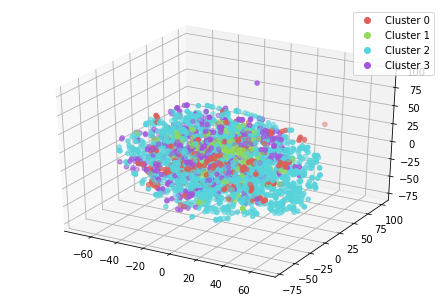

In [31]:
pca_tsne(km_4, 4, matrix)

## Predictions and transformation examples

In [31]:
km.predict(vec.transform(["Xi"]))

array([0], dtype=int32)

In [32]:
km.transform(vec.transform(["covid 19"]))

array([[1.00307482, 0.72013088]])

In [33]:
vec.transform(["namaste"]).todense().sum()

0.0

In [34]:
km.transform(vec.transform(["namaste"]))

array([[0.08297415, 0.32757172]])

In [33]:
print(km.cluster_centers_.shape)

(2, 4870)


In [34]:
vec.transform(["china covid"]).todense().shape

(1, 4870)

## Inverse 

In [22]:
cov_mat = np.cov(matrix.todense().transpose())

In [23]:
inv = np.linalg.lstsq(cov_mat, np.identity(cov_mat.shape[0]))

/cs/home/jk218/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [30]:
inv[0]

array([[-2.31064988e+16,  7.65387141e+15,  2.74502350e+16, ...,
         4.07915934e+14,  1.34183088e+15,  2.16381012e+14],
       [ 7.51865095e+15,  6.14136969e+15, -1.29803817e+16, ...,
        -1.24192404e+14,  1.71246506e+14, -9.09889641e+14],
       [ 2.32787576e+16, -2.92707974e+16, -2.37155900e+14, ...,
         1.63938794e+15,  4.85188551e+14,  7.09063997e+14],
       ...,
       [-1.65933246e+15,  5.53138161e+14,  5.47754515e+15, ...,
         1.11038892e+16,  2.72726581e+14, -8.02763141e+14],
       [ 5.23615962e+14, -3.57233637e+14,  1.42345102e+14, ...,
         1.92403840e+14, -1.77943503e+13,  1.15308324e+14],
       [ 1.25908637e+15, -1.01831902e+14, -9.12696026e+13, ...,
        -4.60465734e+14,  7.85069244e+13, -6.59225714e+14]])

In [36]:
cov_mat.shape

(4582, 4582)

In [37]:
metric = DistanceMetric.get_metric('mahalanobis', VI=inv[0])

In [27]:
other_dist = []
trans_vec = np.asarray(vec.transform(["covid"]).todense()).reshape(-1)
for i in range(0,km.cluster_centers_.shape[0]):
    other_dist.append((i, metric.pairwise([km.cluster_centers_[i,:], trans_vec])))
    other_dist.append((i, distance.mahalanobis(km.cluster_centers_[i,:], trans_vec, inv[0])))

other_dist

NameError: name 'km' is not defined

### Visualise Mahalanobis distance

In [20]:
def plot_distance(km):
    mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}
    dist = {}
    dist["mh"] = {}
    dist["eu"] = {}
    for i in mydict.keys():
        dist["mh"][i] = []
        dist["eu"][i] = []
        for j in mydict[i]:
            dist["mh"][i].append(distance.mahalanobis(km.cluster_centers_[i,:], matrix[j].todense(), inv[0]))
            dist["eu"][i].append( euclidean_distances([km.cluster_centers_[i,:]], matrix[j].todense())[0][0])
    
    
    fig, axes = plt.subplots(len(mydict.keys()), 1, figsize=(10,10), sharex=True)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        seaborn.distplot(dist["mh"][i]).set_title("Cluster " + str(i))


    fig.tight_layout(w_pad=2)    
    fig.suptitle('Mahalanobis Distances ', fontsize=22, y=1.05)    
    plt.savefig("kmeans_mahalanobis_distance_k=" + str(len(mydict.keys())) +  ".png")
    
    fig, axes = plt.subplots(len(mydict.keys()), 1, figsize=(10,10),sharex=True)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        seaborn.distplot(dist["eu"][i]).set_title("Cluster " + str(i))


    fig.tight_layout(w_pad=2)    
    fig.suptitle('Euclidean Distances ', fontsize=22, y=1.05)    
    plt.savefig("kmeans_euclidean_distance_k=" + str(len(mydict.keys())) +  ".png")


In [26]:
other_dist[1][1]

NameError: name 'other_dist' is not defined

In [222]:
dist["mh"][1][0]

57.01519867548241

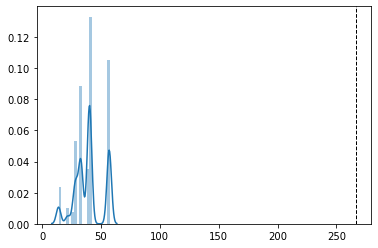

In [233]:
seaborn.distplot(dist["mh"][1])
plt.axvline(other_dist[1][1], color='k', linestyle='dashed', linewidth=1)

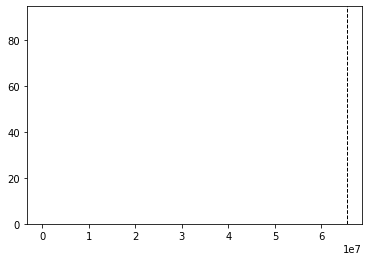

In [216]:
hist = plt.hist(dist["mh"][1])
plt.axvline(other_dist[1][1], color='k', linestyle='dashed', linewidth=1)
plt.show()

In [488]:
# https://stackoverflow.com/questions/27494202/how-do-i-visualize-data-points-of-tf-idf-vectors-for-kmeans-clustering

## Kmeans visualisation

In [21]:
def plot_word_cloud_kmeans(km, number_of_clusters, rows, columns, del_x=None, del_y=None):
    words = {}
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]
    terms = vec.get_feature_names()
    for i in range(number_of_clusters):
        top_ten_words = [terms[ind] for ind in order_centroids[i, :10]]
        words[i] = top_ten_words
    
    centre_distances = {}
    for i in range(number_of_clusters):
        centre_distances[i] = [2 - i for i in np.sort(km.transform(matrix)[:,i])[:10]]
        
    for i in words:
        centre_distances[i] = list(zip(words[i], centre_distances[i]))
        
    cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
    
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    fig, axes = plt.subplots(rows, columns, figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        if i < number_of_clusters:
            fig.add_subplot(ax)
            cloud.generate_from_frequencies(dict(centre_distances[i]))
            plt.gca().imshow(cloud)
            plt.gca().set_title('Cluster ' + str(i), fontdict=dict(size=16))
            plt.gca().axis('off')

    if del_x is not None and del_y is not None:
        fig.delaxes(axes[del_x,del_y])
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig("kmeans_word_cloud_k=" +str(number_of_clusters)+ ".png")

### PCA T-SNE Visualisation

In [68]:
from matplotlib.colors import ListedColormap
def pca_tsne(km, k, matrix):
    labels = km.predict(matrix)
    X = matrix.todense()
    cmap = cmap = ListedColormap(seaborn.color_palette("hls", k))
    labels_color_map = {
        0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404'
    }
    
    
    pca_num_components = 2

    pca = PCA(n_components=pca_num_components)
    reduced_values = pca.fit_transform(X)
    eigenvalues = pca.explained_variance_
#     eigenvalues
        

    fig, ax = plt.subplots()
    for index, instance in enumerate(reduced_values):
        pca_comp_1, pca_comp_2 = reduced_values[index]
        color = labels_color_map[labels[index]]
        ax.scatter(pca_comp_1, pca_comp_2, cmap=cmap)
        
    ax.legend()
    plt.savefig("kmeans_2d_pca_k=" + str(k) + ".png")
    
    
    tsne_num_components = 2
    embeddings = TSNE(n_components=tsne_num_components)
    Y = embeddings.fit_transform(X)

    seaborn.scatterplot(
        x=Y[:, 0], y=Y[:, 1],
        hue=labels,
        palette=seaborn.color_palette("hls", k),
        legend="full",
        alpha=0.4
    )
    
    plt.savefig("kmeans_2d_tsne_k=" + str(k) + ".png")
    
     # 3D
    
    pca_num_components = 3
    pca = PCA(n_components=pca_num_components)
    reduced_values = pca.fit_transform(X)
    eigenvalues = pca.explained_variance_
#     print(eigenvalues)

    fig = plt.figure()
    axes = Axes3D(fig)

    for index, instance in enumerate(reduced_values):
        pca_comp_1, pca_comp_2, pca_comp_3 = reduced_values[index]
        color = labels_color_map[labels[index]]
        axes.scatter(pca_comp_1, pca_comp_2, pca_comp_3, c=color)

    axes.legend()
    plt.savefig("kmeans_3d_pca_k=" + str(k) + ".png")

    
    pal = seaborn.color_palette("hls", k)
    
    fig = plt.figure()
    axes = Axes3D(fig)
    axes.scatter(Y[:,0], Y[:,1], Y[:,2], c=labels, cmap=cmap)

    scatter = []
    cluster_labels = []
    for i in range(0,k):
        scatter.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=pal[i], marker = 'o'))
        cluster_labels.append("Cluster " + str(i))
        
    axes.legend(scatter, cluster_labels, numpoints = 1)

    plt.savefig("kmeans_3d_tsne_k=" + str(k) + ".png")
    

In [17]:
pca_num_components = 2
X = matrix.todense()
pca = PCA(n_components=pca_num_components)
reduced_values = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
eigenvalues

array([0.00902653, 0.00789112])

In [19]:
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1'
}

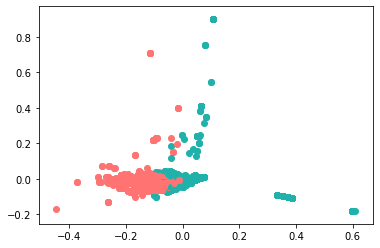

In [20]:
fig, ax = plt.subplots()
for index, instance in enumerate(reduced_values):
    pca_comp_1, pca_comp_2 = reduced_values[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

In [21]:
tsne_num_components = 2
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)

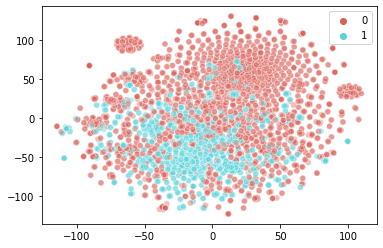

In [22]:
seaborn.scatterplot(
    x=Y[:, 0], y=Y[:, 1],
    hue=labels,
    palette=seaborn.color_palette("hls", 2),
    legend="full",
    alpha=0.4
)

### 3D PCA

In [28]:
pca_num_components = 3
X = matrix.todense()
pca = PCA(n_components=pca_num_components)
reduced_values = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
eigenvalues

array([0.00902652, 0.00789118, 0.00748842])

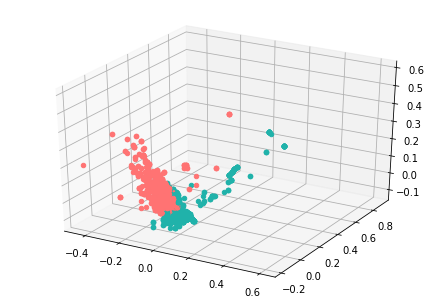

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
axes = Axes3D(fig)

for index, instance in enumerate(reduced_values):
    pca_comp_1, pca_comp_2, pca_comp_3 = reduced_values[index]
    color = labels_color_map[labels[index]]
    axes.scatter(pca_comp_1, pca_comp_2, pca_comp_3, c=color)
plt.show()

In [30]:
tsne_num_components = 3
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)

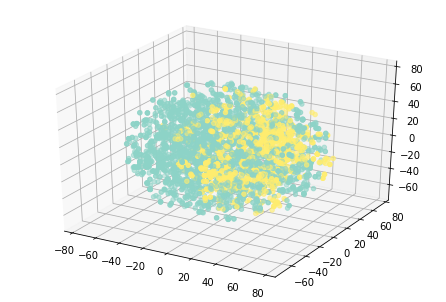

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
axes = Axes3D(fig)

axes.scatter(Y[:,0], Y[:,1], Y[:,2], c=labels, cmap=plt.get_cmap("Set3"))
plt.show()

# Stock Data

## GoldStein Score

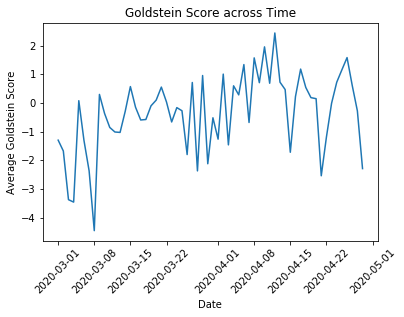

In [78]:
new_data = us_chn_data.groupby('SQLDATE', as_index=False, sort=False)['GoldsteinScale'].mean()
format_str = '%Y%m%d'
new_data.SQLDATE = [datetime.strptime(str(x), format_str) for x in new_data.SQLDATE]
goldstein = new_data[new_data.SQLDATE > datetime(2020,2,29)].sort_values(by="SQLDATE")
plt.plot(goldstein.SQLDATE, goldstein.GoldsteinScale)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Average Goldstein Score")
plt.title("Goldstein Score across Time")
plt.savefig("goldsteinscore.png")

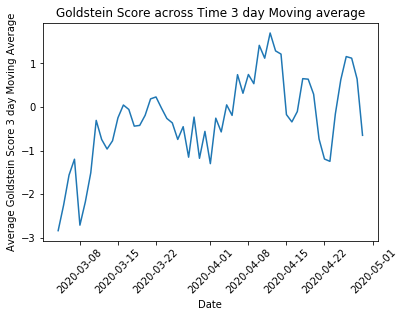

In [82]:
k=3
nd = goldstein.copy()
nd["mean"] = goldstein.rolling(k).mean()
plt.plot(nd["SQLDATE"][k:], nd["mean"][k:])
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Average Goldstein Score 3 day Moving Average")
plt.title("Goldstein Score across Time 3 day Moving average")
plt.savefig("goldsteinscore_ma.png")

## Average Tone

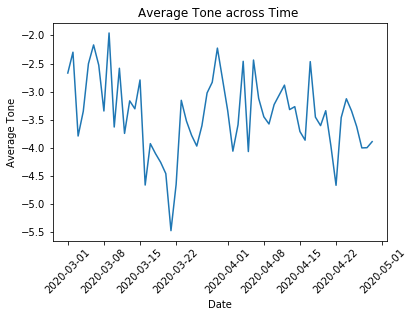

In [83]:
new_data = us_chn_data.groupby('SQLDATE', as_index=False, sort=False)['AvgTone'].mean()

format_str = '%Y%m%d' # The format
new_data.SQLDATE = [datetime.strptime(str(x), format_str) for x in new_data.SQLDATE]

tone = new_data[new_data.SQLDATE > datetime(2020,2,29)].sort_values(by="SQLDATE")

plt.plot(tone.SQLDATE, tone.AvgTone)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Average Tone")
plt.title("Average Tone across Time ")
plt.savefig("avgtone.png")

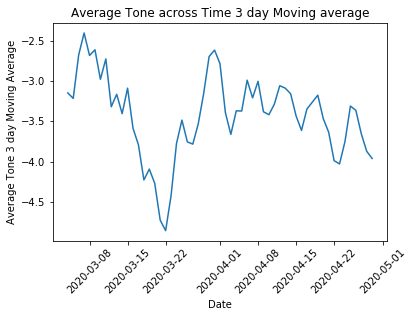

In [84]:
k=3
nd = tone.copy()
nd["mean"] = tone.rolling(k).mean()
plt.plot(nd["SQLDATE"][k:], nd["mean"][k:])
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Average Tone 3 day Moving Average")
plt.title("Average Tone across Time 3 day Moving average")
plt.savefig("avgtone_ma.png")

## Dow Jones

In [158]:
# WGET python


In [314]:
url = "https://query1.finance.yahoo.com/v7/finance/download/%5EDJI?period1=1583020800&period2=1588204800&interval=1d&events=history"

In [315]:
filename = requests.get(url)

In [316]:
f= open('./dow.csv', 'wb')
f.write(filename.content)
f.close()

In [89]:
dow = pd.read_csv("dow.csv")

In [90]:
dow["Diff"] = dow["Open"] - dow["Close"]

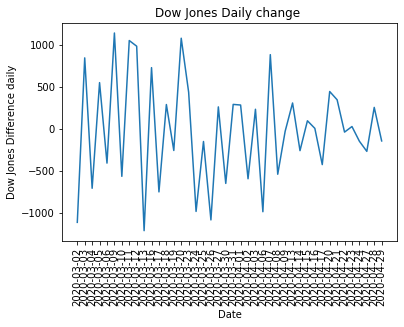

In [95]:
plt.plot(dow["Date"], dow["Diff"])
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Dow Jones Difference daily")
plt.title("Dow Jones Daily change ")
plt.savefig("dow_diff.png")

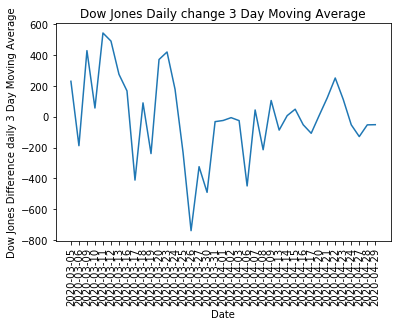

In [96]:
k=3 
nd = dow.copy()
nd["mean"] = dow["Diff"].rolling(k).mean()
plt.plot(nd["Date"][k:], nd["mean"][k:])
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Dow Jones Difference daily 3 Day Moving Average")
plt.title("Dow Jones Daily change 3 Day Moving Average")
plt.savefig("dow_diff_ma.png")

In [321]:
date_data_frame = pd.DataFrame()

In [322]:
date_data_frame["Date"] = pd.date_range(pd.to_datetime("2020/03/01"), periods=61).tolist()

In [323]:
dow["Date"] = pd.to_datetime(dow["Date"])

In [324]:
dow

,Date,Open,High,Low,Close,Adj Close,Volume,Diff
0,2020-03-02,25590.509766,26706.169922,25391.960938,26703.320313,26703.320313,637200000,-1112.810547
1,2020-03-03,26762.470703,27084.589844,25706.279297,25917.410156,25917.410156,647080000,845.060547
2,2020-03-04,26383.679688,27102.339844,26286.310547,27090.859375,27090.859375,457590000,-707.179687
3,2020-03-05,26671.919922,26671.919922,25943.330078,26121.279297,26121.279297,477370000,550.640625
4,2020-03-06,25457.210938,25994.380859,25226.619141,25864.779297,25864.779297,599780000,-407.568359
5,2020-03-09,24992.359375,24992.359375,23706.070313,23851.019531,23851.019531,750430000,1141.339844
6,2020-03-10,24453.000000,25020.990234,23690.339844,25018.160156,25018.160156,654860000,-565.160156
7,2020-03-11,24604.630859,24604.630859,23328.320313,23553.220703,23553.220703,663960000,1051.410156
8,2020-03-12,22184.710938,22837.949219,21154.460938,21200.619141,21200.619141,908260000,984.091797
9,2020-03-13,21973.820313,23189.759766,21285.369141,23185.619141,23185.619141,843080000,-1211.798828


In [325]:
fin_df = pd.merge(date_data_frame, dow, "left", on="Date")

In [326]:
fin_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Diff'], dtype='object')

In [327]:
fin_df.drop(["High", "Low", "Adj Close", "Volume"], axis=1, inplace=True)

In [328]:
fin_df.dtypes

Date     datetime64[ns]
Open            float64
Close           float64
Diff            float64
dtype: object

In [329]:
fin_df

,Date,Open,Close,Diff
0,2020-03-01,NaN,NaN,NaN
1,2020-03-02,25590.509766,26703.320313,-1112.810547
2,2020-03-03,26762.470703,25917.410156,845.060547
3,2020-03-04,26383.679688,27090.859375,-707.179687
4,2020-03-05,26671.919922,26121.279297,550.640625
...,...,...,...,...
56,2020-04-26,NaN,NaN,NaN
57,2020-04-27,23866.150391,24133.779297,-267.628906
58,2020-04-28,24357.169922,24101.550781,255.619141
59,2020-04-29,24490.369141,24633.859375,-143.490234


In [330]:
fin_df.set_index('Date', inplace=True)

In [331]:
int_dow = fin_df.interpolate(method='linear', limit_direction='both')

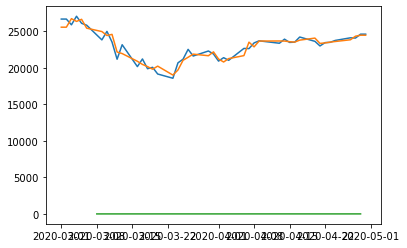

In [335]:
plt.plot(int_dow.index, int_dow.Close)
plt.plot(int_dow.index, int_dow.Open)

k=7 
nd = goldstein.copy()
nd["mean"] = goldstein.rolling(k).mean()
plt.plot(nd["SQLDATE"][k:], nd["mean"][k:])

In [88]:
plt.plot(int_dow.index, int_dow.Diff)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Dow Jones Difference daily")
plt.title("Dow Jones Daily change ")
plt.savefig("dow_diff.png")

NameError: name 'int_dow' is not defined

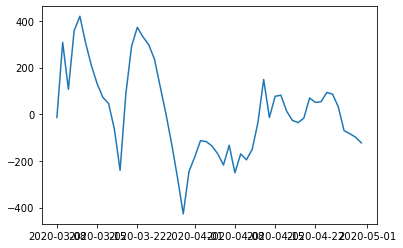

In [339]:
k=7
nd = int_dow.copy()
nd["Diff_copy"] = int_dow.Diff.rolling(k).mean()
plt.plot(nd.index[k:], nd["Diff_copy"][k:])

In [341]:
merged = pd.merge(pd.merge(tone, goldstein, "inner", "SQLDATE"), int_dow, right_index=True, left_on='SQLDATE')

In [342]:
merged

,SQLDATE,AvgTone,GoldsteinScale,Open,Close,Diff
0,2020-03-01,-2.669227,-1.296000,25590.509766,26703.320313,-1112.810547
1,2020-03-02,-2.298869,-1.674000,25590.509766,26703.320313,-1112.810547
2,2020-03-03,-3.788864,-3.372414,26762.470703,25917.410156,845.060547
3,2020-03-04,-3.350338,-3.457692,26383.679688,27090.859375,-707.179687
4,2020-03-05,-2.504286,0.081395,26671.919922,26121.279297,550.640625
5,2020-03-06,-2.169450,-1.303922,25457.210938,25864.779297,-407.568359
6,2020-03-07,-2.528427,-2.368000,25302.260417,25193.526042,108.734375
7,2020-03-08,-3.343864,-4.453846,25147.309896,24522.272786,625.037110
8,2020-03-09,-1.957146,0.300000,24992.359375,23851.019531,1141.339844
9,2020-03-10,-3.628694,-0.367442,24453.000000,25018.160156,-565.160156


## Modelling using basic techniques

## Random

In [75]:

# Single 15 minute interval pull, output to json format with mentions table
results = gd2.Search(['2019 Nov 1'],table='mentions', coverage=True)
print(len(results))

448157


In [76]:
results

,GLOBALEVENTID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras
0,883657799,20191101020000,20191101040000,1,brudirect.com,https://brudirect.com/news.php?id=79831,2,547,696,621,1,40,2037,2.339181,NaN,NaN
1,883657800,20191101020000,20191101040000,1,brudirect.com,https://brudirect.com/news.php?id=79831,2,547,696,621,0,60,2037,2.339181,NaN,NaN
2,883657801,20191101020000,20191101040000,1,brudirect.com,https://brudirect.com/news.php?id=79831,2,547,696,728,1,100,2037,2.339181,NaN,NaN
3,883669697,20191101033000,20191101040000,1,msn.com,https://www.msn.com/en-ca/finance/topstories/c...,14,3816,3870,3865,1,100,4381,0.137741,NaN,NaN
4,883672640,20191101040000,20191101040000,1,guardian.ng,https://guardian.ng/business-services/what-bre...,11,4616,4660,4644,0,10,5414,-2.505695,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448152,883824027,20191101203000,20191101231500,1,guernseypress.com,https://guernseypress.com/news/uk-news/2019/11...,2,415,-1,380,1,60,3085,0.198413,NaN,NaN
448153,883848133,20191101231500,20191101231500,1,newschannel10.com,https://www.newschannel10.com/2019/11/01/clovi...,4,626,-1,688,1,30,1865,-8.722741,NaN,NaN
448154,883848134,20191101231500,20191101231500,1,kcbd.com,https://www.kcbd.com/2019/11/01/clovis-man-get...,2,382,390,408,0,20,2388,-7.323232,NaN,NaN
448155,883848135,20191101231500,20191101231500,1,americanmachinist.com,https://www.americanmachinist.com/machining-cu...,1,1761,-1,1823,1,30,3879,0.972447,NaN,NaN


In [ ]:
filtered_words = [word for word in functools.reduce(operator.iconcat, filt_list_of_things, []) if word not in stopwords.words('english')]

In [41]:
import requests
from bs4 import BeautifulSoup

In [25]:
results2["SOURCEURL"][0]

'https://www.theprogress.com/news/after-blackface-scandal-trudeau-shuns-photo-ops-of-trick-or-treating/'

In [32]:

for i in range(0,100):
    ret = requests.get(results2["SOURCEURL"][i])
    if ret.status_code == 200:
        break;



In [52]:
ret.url

'https://www.tnp.sg/news/singapore/scdf-ragging-death-warrant-officer-third-person-be-convicted'

In [37]:
ret.content

b'<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema# schema: http://schema.org/">\n<head>\n  <link rel="profile" href="http://www.w3.org/1999/xhtml/vocab" />\n  <meta charset="utf-8">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no">\n  <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png">\n  <link rel="icon" type="image/png" href="/favicon-32x32.png" sizes="32x32">\

In [55]:
import html5lib

In [57]:
soup1 = BeautifulSoup(ret.content, "html.parser")

In [58]:
headline = soup1.find_all('h2', )

In [60]:
headline

[<h2 class="block-title">Popular</h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/youth-who-was-popular-girls-was-sexual-predator">Sexual predator gets 22 years' jail and 24 strokes for preying on 19 victims, including minors</a></h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/scdf-ragging-death-officers-argued-over-push">SCDF ragging death: Officers argued over push</a></h2>,
 <h2 class="byline-name"><a href="/author/shaffiq-alkhatib">Shaffiq Alkhatib</a></h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/nus-students-get-zero-marks-cheating-take-home-exam">NUS students get zero for cheating on take-home exam</a></h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/man-63-fined-3500-meeting-friends-drink-beer-public">Man, 63, fined $3,500 for meeting friends to drink beer</a></h2>,
 <h2 class="card-title"><a href="https://www.tnp.sg/news/singapore/fishmonger-spits-mutton-seller-tekka-market-frac

## TFIDF things

In [142]:
text = "The U.S.-China ‘cold war’ is here — and Beijing may start targeting Washington’s allies, analysts say From a trade fight to a war of words over the origin of the coronavirus, to greater scrutiny of Chinese firms on Wall Street — relations between the U.S. and China have nosedived in recent years. A new “cold war” is here and things could get uglier as other countries get dragged into the conflict, analysts warn. “Things will get worse — perhaps much worse — before they get better. Decoupling is underway,” said Dan Ikenson, director of the Herbert A. Stiefel Center for Trade Policy Studies at the Cato Institute, referring to an economic split between the world’s two largest economies. Beijing could also start targeting America’s allies, as it embarks on what analysts call the “wolf warrior diplomacy.” It is named after a series of hugely-popular movies where Chinese fighters defeat adversaries globally. Most recently, the situation escalated after China proposed a new security law for Hong Kong, a semi-autonomous Chinese territory that has a special trading relationship with the U.S. President Donald Trump swiftly announced that the U.S. will revoke the city’s preferential status. “Hong Kong is no longer sufficiently autonomous to warrant the special treatment that we have afforded the territory” since the former British colony was returned to China in 1997, he said. China does not want to get into a full-scale confrontation with the US at the present time. It wants to concentrate on containing the virus, reviving the economy and pushing through the security law in Hong Kong. U.S.-China relations have been strained since 2018, when the two countries were embroiled in a protracted trade war — which dragged down global growth and culminated in a phase one deal that was signed in January. Their rocky relations started up again early this year, when U.S. President Donald Trump blamed China for the spread of the coronavirus pandemic. Recently, tensions moved to the financial markets. The U.S. Senate passed legislation last month that could restrict Chinese companies from listing on American exchanges or raising money from investors on Wall Street, unless they abide by Washington’s regulatory and audit standards. “Many economic redundancies will emerge as the United States and China replicate efforts and compete for the allegiances of the rest of the world by offering carrots and threatening sticks,” Ikenson said. “That is what is meant by the emergence of a new cold war environment.” Beijing’s ‘wolf diplomacy’ Beijing could use the relatively new strategy, termed “wolf warrior diplomacy” by some analysts, to hit out at those perceived to be on Washington’s side. Christopher Granville from research firm TS Lombard, calls the recent uptick in tensions “Cold War 2.0,” said some U.S. allies might be “repaid with ‘wolf diplomacy’ for perceived affronts to the legitimacy of the Chinese system.” Some of those tactics are already playing out, Granville said in a note. For instance, China suspended some beef imports from Australia after the latter called for a global enquiry into the origins of the coronavirus. ″‘Wolf Warrior diplomacy’ is China’s new no-holds-barred approach to the outside world,” added Edward Lucas of the Center for European Policy Analysis in a note last month. He added: “The backlash against Wolf Warrior diplomacy is growing. China has stoked anger in Australia, Canada, Germany, the Netherlands, and Sweden — to take just a few recent examples.” Just last Friday, Beijing advised its citizens not to travel to Australia, saying there’s racial discrimination and violence against the Chinese in relation to the pandemic. Australia has disputed that, according to Reuters. Elsewhere, the United Kingdom could also find itself on the receiving end of China’s wrath after Britain offered visa options to the Hong Kong people following concerns that China was tightening its grip on the city, Granville added. No full-blown confrontation for now It’s in neither party’s interest to bring their so-called cold war too far at this point, however, say analysts. Beijing will probably limit itself to “a combination of more neutral tit-for-tat and veiled warnings,” said TS Lombard. “While it will react rhetorically, China does not want to get into a full-scale confrontation with the US at the present time. It wants to concentrate on containing the virus, reviving the economy and pushing through the security law in Hong Kong,” Jonathan Fenby of TS Lombard told CNBC in an email. 'Relations with the US have some influence on these issues but are not the main concern right now.' On the part of the U.S., while Trump would likely seek to maximize anti-China sentiment during his presidential campaign, he too may restrain himself ultimately Undoubtedly, the resulting political gains from 'China-bashing' will come at a lower economic cost, at a time when the stock market is strong, said Granville of TS Lombard. Still, 'Trump will remain vigilant about containing that economic cost since the practical effects of unbridled escalation on China – from reduced farm incomes to tanking markets – would outweigh the favourable 'tough guy' impression on his voter base,' he wrote. However, the Trump administration is not likely going to be the only one targeting China. 'There seems to be broad bipartisan support for this new dispensation, which means things probably won’t change much under a Biden administration,' said Cato Institute’s Ikenson, referring to the possibility of a new administration under former U.S. Vice President Joe Biden, who has formally secured a Democratic presidential nomination. Former Singapore senior diplomat Bilahari Kausikan, however, told CNBC last week that he doesn’t think both countries are 'on an inevitable collision course.' 'People forget one big factor — and that’s the nuclear factor. There is a state of nuclear deterrence, and that makes war by design highly improbable,' said Kausikan, dismissing outright conflict between the two world powers. 'Doesn’t mean it cannot happen by accident, but it is improbable,' said Kausikan, who was formerly Singapore’s Permanent Representative to the United Nations, and previously served as permanent secretary at the Ministry of Foreign Affairs in Singapore."

In [143]:
del string

In [144]:
fin_string = re.sub(r'[^\w\s]','',text)

In [146]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
vectors = vectorizer.fit_transform([fin_string])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
new_df = df.transpose()
new_df.columns = ["TF/IDF"]
new_df.sort_values("TF/IDF", ascending=False)

,TF/IDF
china,0.295778
us,0.271130
said,0.246482
war,0.197186
new,0.172537
...,...
greater,0.024648
going,0.024648
globally,0.024648
germany,0.024648
